In [1]:
import pandas as pd
import pylab as pl
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploring Business licenses 

In [215]:
licenses = pd.read_csv("License_Applications.csv")

In [3]:
licenses.shape

(224163, 25)

In [4]:
licenses.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1  33312-2016-RELE    2010590-DCA     Business                Renewal   
2  33701-2016-RELE    2025971-DCA     Business                Renewal   
3   1223-2017-RHIS    1217547-DCA   Individual                Renewal   
4  20143-2017-ALAU    2064612-DCA     Business            Application   

            Business Name  Status  Start Date    End Date  \
0            PEYKO TZENOV  Issued  01/09/2017  01/10/2017   
1  T-MOBILE NORTHEAST LLC  Issued  12/28/2016  01/07/2017   
2   LUCAS ELECTRONICS INC  Issued  12/31/2016  01/10/2017   
3     JUSTINIANO SALDIVAR  Issued  01/09/2017  01/10/2017   
4            LEUNG, WAI M  Issued  12/26/2017  01/09/2018   

  Temp Op Letter Issued Temp Op Letter Expiration       ...       Unit Type  \
0                   NaN                       NaN       ...             NaN   
1                   NaN                       NaN       ...             NaN   
2                   NaN                       NaN       ...             NaN   
3                   NaN                       NaN       ...             NaN   
4                   NaN                       NaN       ...             NaN   

  Unit Description       City State    Zip Contact Phone  Longitude  \
0  NaN         NaN      BRONX    NY  10467    9178047161 -73.877091   
1  NaN         NaN   BROOKLYN    NY  11201    8009279801 -73.987746   
2  NaN         NaN   BROOKLYN    NY  11222  347-987-3235 -73.954098   
3  NaN         NaN  GLEN OAKS    NY  11004    7189748124        NaN   
4  NaN         NaN   BROOKLYN    NY  11223    6464672890 -73.960942   

    Latitude Active Vehicles  
0  40.876214             NaN  
1  40.691630             NaN  
2  40.729869             NaN  
3        NaN             NaN  
4  40.594763             NaN  

[5 rows x 25 columns]

In [5]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [216]:
type(licenses["Start Date"].iloc[1])

str

In [217]:
licenses['Start Date'] = pd.to_datetime(licenses['Start Date'])

In [219]:
licenses["Start Date"].describe()

count                  224163
unique                   4640
top       2017-02-28 00:00:00
freq                      784
first     1998-04-10 00:00:00
last      2018-03-29 00:00:00
Name: Start Date, dtype: object

In [223]:
licenses = licenses[licenses["Start Date"]>'12/31/2013']
licenses = licenses[licenses["Start Date"]<'01/01/2018']

In [224]:
licenses["Start Date"].describe()

count                  155842
unique                   1357
top       2017-02-28 00:00:00
freq                      784
first     2014-01-02 00:00:00
last      2017-12-31 00:00:00
Name: Start Date, dtype: object

In [225]:
zip_ref = zipfile.ZipFile("ZIP_CODE.zip", 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("census_tracts.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [226]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
ct = gp.GeoDataFrame.from_file("geo_export_04e27bfe-654f-460f-beae-1bb88eaacb66.shp")

In [227]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

In [228]:
zipcodes.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

## Quick visualization of where the Businesses licenses aplications are located 

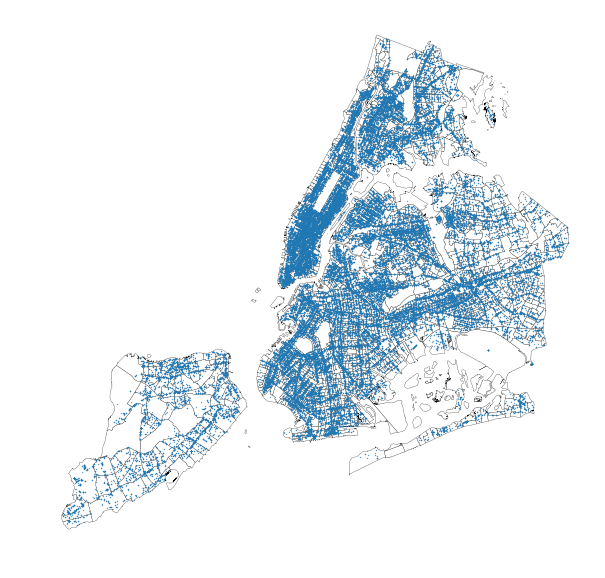

In [229]:

cp.choroplethNYC(ct, column=None, color="white", edgecolor="black", lw=0.25);

pl.scatter(licenses.Longitude, licenses.Latitude, s=0.1)


# We groupby zip code so we have the count of the busniness licenses by zip  

In [230]:
countzip = licenses.groupby(licenses["Zip"]).count()

In [231]:
countzip.head()

Application ID  License Number  License Type  Application or Renewal  \
Zip                                                                           
00                  1               1             1                       1   
000                11              11            11                      11   
00000               9               8             9                       9   
00623               1               1             1                       1   
00637               2               2             2                       2   

       Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
Zip                                                                         
00                 1       1           1         1                      0   
000               11      11          11        11                      0   
00000              9       9           9         9                      0   
00623              1       1           1         1                      0   
00637              2       2           2         2                      0   

       Temp Op Letter Expiration  License Category  Application Category  \
Zip                                                                        
00                             0                 1                     1   
000                            0                11                    11   
00000                          0                 9                     9   
00623                          0                 1                     1   
00637                          0                 2                     2   

       Building Number  Street  Street 2  Unit Type  Unit  Description  City  \
Zip                                                                            
00                   1       1         0          0     0            1     1   
000                 11      11         0          0     0            6    11   
00000                9       9         0          0     2            2     9   
00623                1       0         0          0     0            0     1   
00637                2       2         0          0     0            0     2   

       State  Contact Phone  Longitude  Latitude  Active Vehicles  
Zip                                                                
00         1              1          0         0                0  
000       11             11          4         4                0  
00000      9              8          3         3                0  
00623      1              1          0         0                0  
00637      2              2          0         0                0

In [232]:
countzip["Zip"] = countzip.index
countzip["Zips"] = countzip.Zip

In [233]:
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

# Transform into geodataframe

In [234]:
zips_ = gp.GeoDataFrame(zips)

In [235]:
licenses.head(1)

Application ID License Number License Type Application or Renewal  \
0  1066-2017-RHIC    1294131-DCA     Business                Renewal   

  Business Name  Status Start Date    End Date Temp Op Letter Issued  \
0  PEYKO TZENOV  Issued 2017-01-09  01/10/2017                   NaN   

  Temp Op Letter Expiration             License Category Application Category  \
0                       NaN  Home Improvement Contractor              Special   

  Building Number            Street Street 2 Unit Type Unit Description  \
0            3280  RESERVOIR OVAL E      NaN       NaN  NaN         NaN   

    City State    Zip Contact Phone  Longitude   Latitude Active Vehicles  
0  BRONX    NY  10467    9178047161 -73.877091  40.876214             NaN

In [236]:
zips.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1190            1146          1190                    1190   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1190    1190        1190      1184                      9   

   Temp Op Letter Expiration  License Category  Application Category  \
0                          9              1190                  1190   

   Building Number  Street  Street 2  Unit Type  Unit  Description  City  \
0             1135    1172        83        306   532           83  1190   

   State  Contact Phone  Longitude  Latitude  Active Vehicles    Zip   Zips  \
0   1157           1048        893       893                0  10001  10001   

  ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE    COUNTY ST_FIPS  \
0   10001       0  New York     22413.0  1.779494e+07    NY  New York      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      061  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((981958.6472873986 213464.4530421346,...

Text(0.5,1,'Distribution of number of Business licenses by zip code')

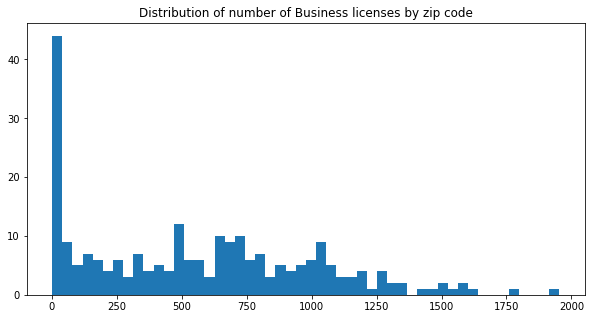

In [237]:
pl.hist(zips["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [238]:
zips1 = zips[zips["License Type"]>0]

Text(0.5,1,'Distribution of number of Business licenses by zip code')

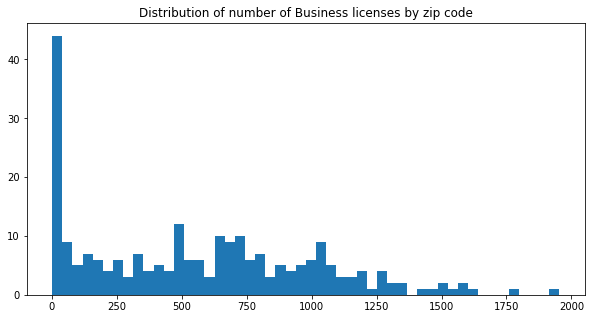

In [239]:
pl.hist(zips1["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [240]:
type(zips.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [241]:
type(zips_.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [242]:
zips_.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1190            1146          1190                    1190   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1190    1190        1190      1184                      9   

   Temp Op Letter Expiration  License Category  Application Category  \
0                          9              1190                  1190   

   Building Number  Street  Street 2  Unit Type  Unit  Description  City  \
0             1135    1172        83        306   532           83  1190   

   State  Contact Phone  Longitude  Latitude  Active Vehicles    Zip   Zips  \
0   1157           1048        893       893                0  10001  10001   

  ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE    COUNTY ST_FIPS  \
0   10001       0  New York     22413.0  1.779494e+07    NY  New York      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      061  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((981958.6472873986 213464.4530421346,...

# Number of total licenses by zip code

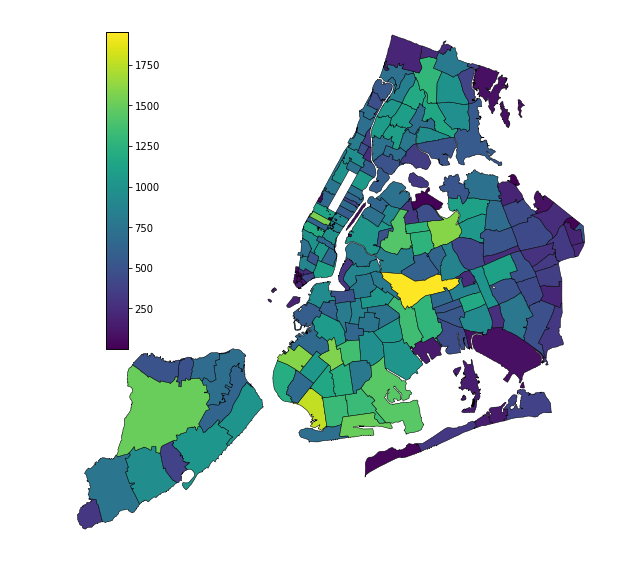

In [243]:


cp.choroplethNYC(zips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);



# Here the general overview is over, we need to start looking for specific types of licenses to see if we get something better.

In [244]:
licenses.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1  33312-2016-RELE    2010590-DCA     Business                Renewal   
2  33701-2016-RELE    2025971-DCA     Business                Renewal   
3   1223-2017-RHIS    1217547-DCA   Individual                Renewal   
4  20143-2017-ALAU    2064612-DCA     Business            Application   

            Business Name  Status Start Date    End Date  \
0            PEYKO TZENOV  Issued 2017-01-09  01/10/2017   
1  T-MOBILE NORTHEAST LLC  Issued 2016-12-28  01/07/2017   
2   LUCAS ELECTRONICS INC  Issued 2016-12-31  01/10/2017   
3     JUSTINIANO SALDIVAR  Issued 2017-01-09  01/10/2017   
4            LEUNG, WAI M  Issued 2017-12-26  01/09/2018   

  Temp Op Letter Issued Temp Op Letter Expiration  \
0                   NaN                       NaN   
1                   NaN                       NaN   
2                   NaN                       NaN   
3                   NaN                       NaN   
4                   NaN                       NaN   

               License Category Application Category Building Number  \
0   Home Improvement Contractor              Special            3280   
1             Electronics Store                Basic             435   
2             Electronics Store                Basic             886   
3  Home Improvement Salesperson              Special           25419   
4                     Laundries                Basic            2548   

             Street Street 2 Unit Type Unit Description       City State  \
0  RESERVOIR OVAL E      NaN       NaN  NaN         NaN      BRONX    NY   
1         FULTON ST      NaN       NaN  NaN         NaN   BROOKLYN    NY   
2     MANHATTAN AVE      NaN       NaN  NaN         NaN   BROOKLYN    NY   
3           82ND RD      NaN       NaN  NaN         NaN  GLEN OAKS    NY   
4  CONEY ISLAND AVE      NaN       NaN  NaN         NaN   BROOKLYN    NY   

     Zip Contact Phone  Longitude   Latitude Active Vehicles  
0  10467    9178047161 -73.877091  40.876214             NaN  
1  11201    8009279801 -73.987746  40.691630             NaN  
2  11222  347-987-3235 -73.954098  40.729869             NaN  
3  11004    7189748124        NaN        NaN             NaN  
4  11223    6464672890 -73.960942  40.594763             NaN

In [245]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [246]:
licenses["Application or Renewal"].unique()

array(['Renewal', 'Application'], dtype=object)

In [247]:
print("Start date max and min:")
print (licenses["Start Date"].min())
print (licenses["Start Date"].max())





Start date max and min:
2014-01-02 00:00:00
2017-12-31 00:00:00


# Exploring New Licenses

In [248]:
newlicenses = licenses[licenses["Application or Renewal"]== "Application"]

In [249]:
ncountzip = newlicenses.groupby(licenses["Zip"]).count()
ncountzip["Zip"] = ncountzip.index

nzips = pd.merge(ncountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

nzips_ = gp.GeoDataFrame(nzips)

# Number of new licenses by zip code

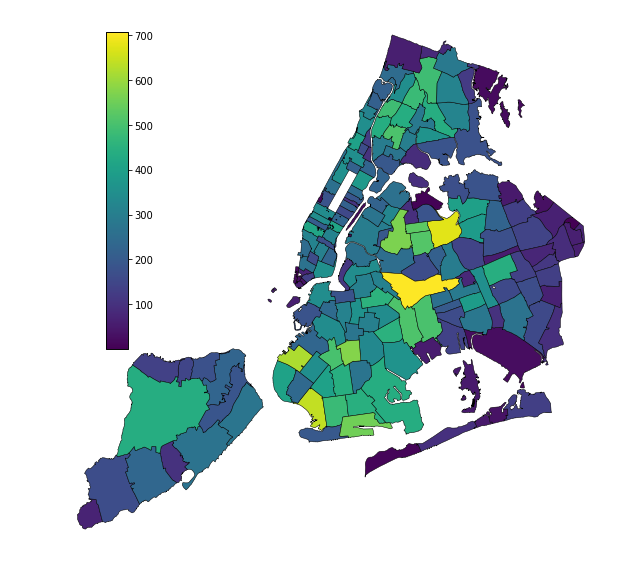

In [250]:
cp.choroplethNYC(nzips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring Renewals

In [251]:
oldlicenses = licenses[licenses["Application or Renewal"]== "Renewal"]

In [252]:
ocountzip = oldlicenses.groupby(licenses["Zip"]).count()
ocountzip["Zip"] = ocountzip.index

ozips = pd.merge(ocountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

ozips_ = gp.GeoDataFrame(ozips)

In [253]:
type(ocountzip.Zip.iloc[1])

str

# Number of renewal licenses by zip code

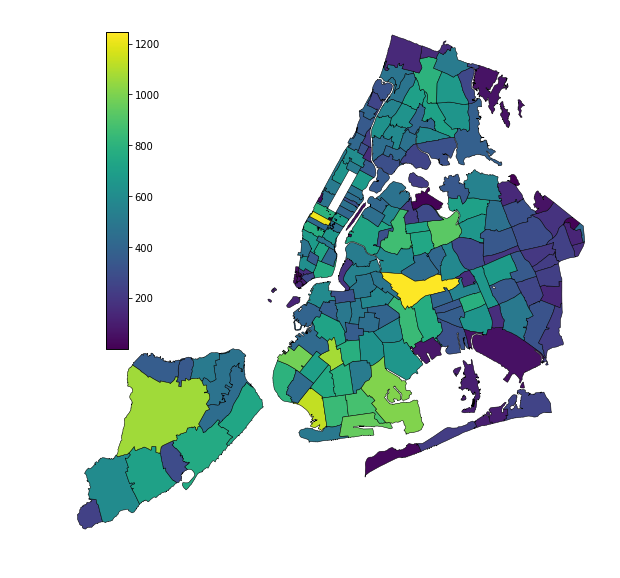

In [254]:
cp.choroplethNYC(ozips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Devide new / old

In [255]:
ozips["count_old"] = ozips["License Type"]
nzips["count_new"] = nzips["License Type"]
nzips["geometry"].drop

<bound method NDFrame.drop of 0      POLYGON ((981958.6472873986 213464.4530421346,...
1      POLYGON ((991339.8703228086 207576.7837151289,...
2      POLYGON ((989830.469142139 207048.1263078749, ...
3      POLYGON ((981197.408652395 196571.0816452205, ...
4      POLYGON ((972696.8446168154 193014.5477478057,...
5      POLYGON ((977542.4500830621 188447.2783390433,...
6      POLYGON ((971218.3702115566 190710.8587856293,...
7      POLYGON ((982595.6794779003 195880.7536295503,...
8      POLYGON ((981136.3431577235 198082.3837407082,...
9      POLYGON ((980538.9073447287 200658.5114624649,...
10     POLYGON ((991606.4032543153 205494.1464762092,...
11     POLYGON ((987500.0003778934 210146.4376965463,...
12     POLYGON ((986378.4337233901 210178.5990495533,...
13     POLYGON ((985200.0558308065 205072.0203519613,...
14     POLYGON ((983216.1014653891 203868.9381124675,...
15     POLYGON ((983985.4854253083 205856.7261316329,...
16     POLYGON ((989286.3432618976 213322.780097127, ...
1

In [256]:
df = pd.merge(ozips,nzips,on="Zip")

In [257]:
df.head(1)

Application ID_x  License Number_x  License Type_x  \
0               773               773           773.0   

   Application or Renewal_x  Business Name_x  Status_x  Start Date_x  \
0                       773              773       773           773   

   End Date_x  Temp Op Letter Issued_x  Temp Op Letter Expiration_x  \
0         771                        6                            6   

   License Category_x  Application Category_x  Building Number_x  Street_x  \
0                 773                     773                731       771   

   Street 2_x  Unit Type_x  Unit_x  Description_x  City_x  State_x    Zip  \
0          64          195     326             79     773      740  10001   

   Contact Phone_x  Longitude_x  Latitude_x  Active Vehicles_x ZIPCODE_x  \
0              730          614         614                  0     10001   

  BLDGZIP_x PO_NAME_x  POPULATION_x        AREA_x STATE_x  COUNTY_x ST_FIPS_x  \
0         0  New York       22413.0  1.779494e+07      NY  New York        36   

  CTY_FIPS_x                 URL_x  SHAPE_AREA_x  SHAPE_LEN_x  \
0        061  http://www.usps.com/           0.0          0.0   

                                          geometry_x  count_old  \
0  POLYGON ((981958.6472873986 213464.4530421346,...      773.0   

   Application ID_y  License Number_y  License Type_y  \
0               417               373           417.0   

   Application or Renewal_y  Business Name_y  Status_y  Start Date_y  \
0                       417              417       417           417   

   End Date_y  Temp Op Letter Issued_y  Temp Op Letter Expiration_y  \
0         413                        3                            3   

   License Category_y  Application Category_y  Building Number_y  Street_y  \
0                 417                     417                404       401   

   Street 2_y  Unit Type_y  Unit_y  Description_y  City_y  State_y  \
0          19          111     206              4     417      417   

   Contact Phone_y  Longitude_y  Latitude_y  Active Vehicles_y ZIPCODE_y  \
0              318          279         279                  0     10001   

  BLDGZIP_y PO_NAME_y  POPULATION_y        AREA_y STATE_y  COUNTY_y ST_FIPS_y  \
0         0  New York       22413.0  1.779494e+07      NY  New York        36   

  CTY_FIPS_y                 URL_y  SHAPE_AREA_y  SHAPE_LEN_y  \
0        061  http://www.usps.com/           0.0          0.0   

                                          geometry_y  count_new  
0  POLYGON ((981958.6472873986 213464.4530421346,...      417.0

In [258]:
df["n/o"] = df["count_new"]/df["count_old"]

df_ = gp.GeoDataFrame(df)

In [259]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

In [260]:
df_["geometry"] = df_["geometry_x"]

# Number of new licenses / renewal licenses. 

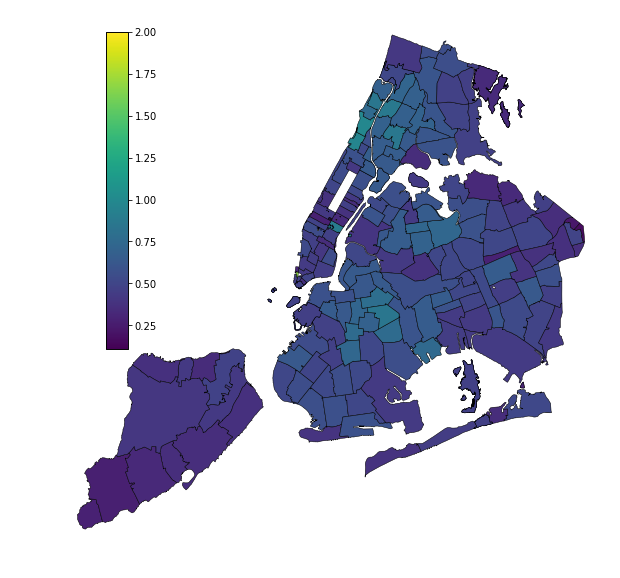

In [261]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([  3.,  12.,  37.,  82.,  56.,  37.,  16.,   4.,   3.,   6.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.]),
 array([ 0.11111111,  0.20555556,  0.3       ,  0.39444444,  0.48888889,
         0.58333333,  0.67777778,  0.77222222,  0.86666667,  0.96111111,
         1.05555556,  1.15      ,  1.24444444,  1.33888889,  1.43333333,
         1.52777778,  1.62222222,  1.71666667,  1.81111111,  1.90555556,  2.        ]),
 <a list of 20 Patch objects>)

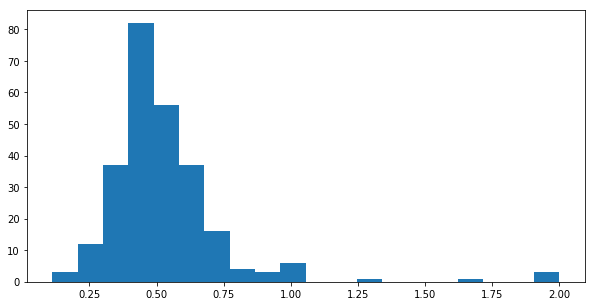

In [264]:
pl.hist(df_["n/o"], bins=20)

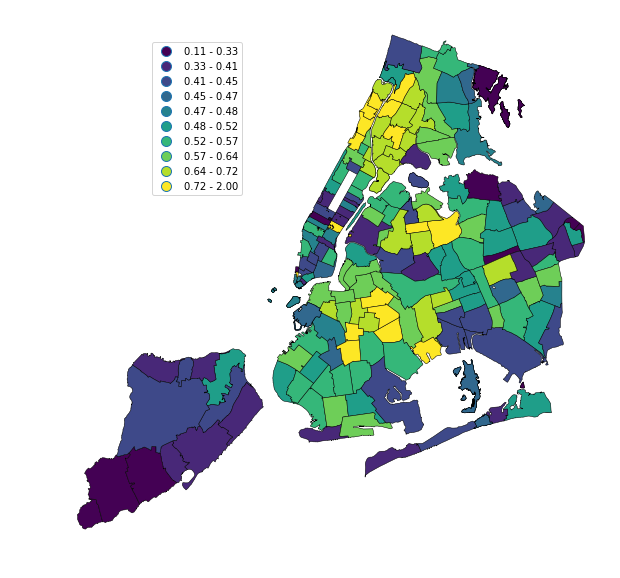

In [265]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");

In [266]:
greaterthan1 = df_[df_["n/o"]>1]
smallerthan1 = df_[df_["n/o"]<1]

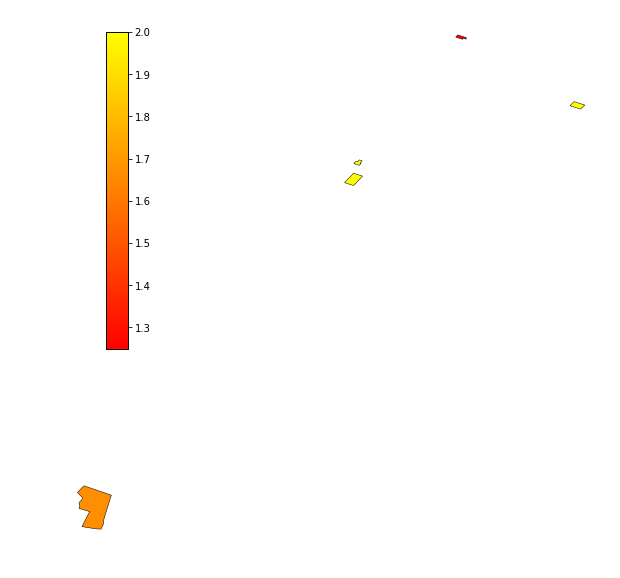

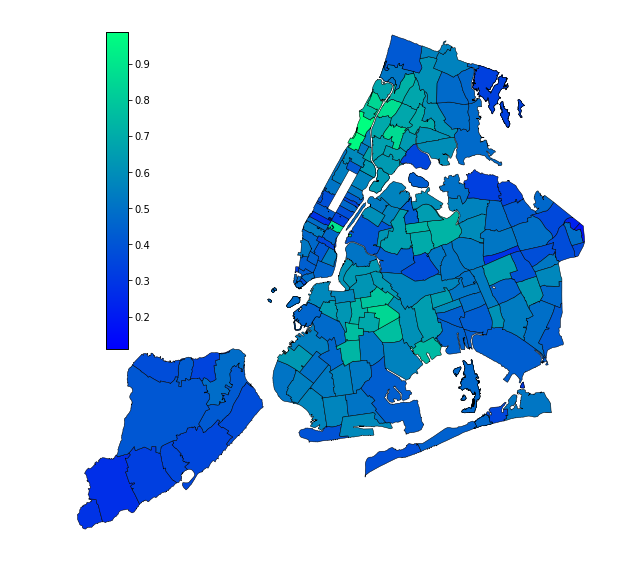

In [267]:
cp.choroplethNYC(greaterthan1, column="n/o", color="k",cmap="autumn", edgecolor="k", lw=0.5)
cp.choroplethNYC(smallerthan1, column="n/o", color="k",cmap="winter", edgecolor="k", lw=0.5);

In [268]:
zips_.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1190            1146        1190.0                    1190   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1190    1190        1190      1184                      9   

   Temp Op Letter Expiration  License Category  Application Category  \
0                          9              1190                  1190   

   Building Number  Street  Street 2  Unit Type  Unit  Description  City  \
0             1135    1172        83        306   532           83  1190   

   State  Contact Phone  Longitude  Latitude  Active Vehicles    Zip   Zips  \
0   1157           1048        893       893                0  10001  10001   

  ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE    COUNTY ST_FIPS  \
0   10001       0  New York     22413.0  1.779494e+07    NY  New York      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      061  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((981958.6472873986 213464.4530421346,...

In [269]:
zips_["density"] = zips_["License Type"]/zips_["AREA"]
zips_["per_capita"] = zips_["License Type"]/zips_["POPULATION"]

In [270]:
zips0_ = zips_[zips_["per_capita"]<0.4]

(array([ 187.,    5.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  6.02109786e-07,   8.30229534e-05,   1.65443797e-04,
          2.47864641e-04,   3.30285484e-04,   4.12706328e-04,
          4.95127171e-04,   5.77548015e-04,   6.59968859e-04,
          7.42389702e-04,   8.24810546e-04]),
 <a list of 10 Patch objects>)

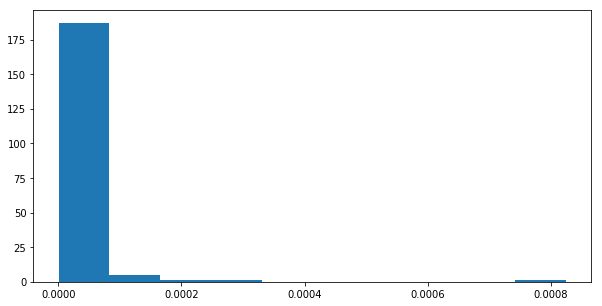

In [271]:
pl.hist(zips0_.density)

In [272]:
zips2_ = zips_[zips_["density"]<0.0004]

# Exploring number of business licenses contoled by area and population. First by area

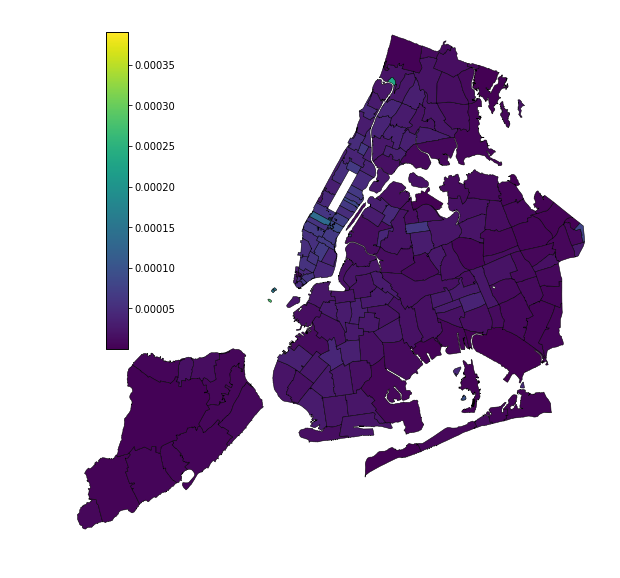

In [273]:
cp.choroplethNYC(zips2_, column="density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Now population

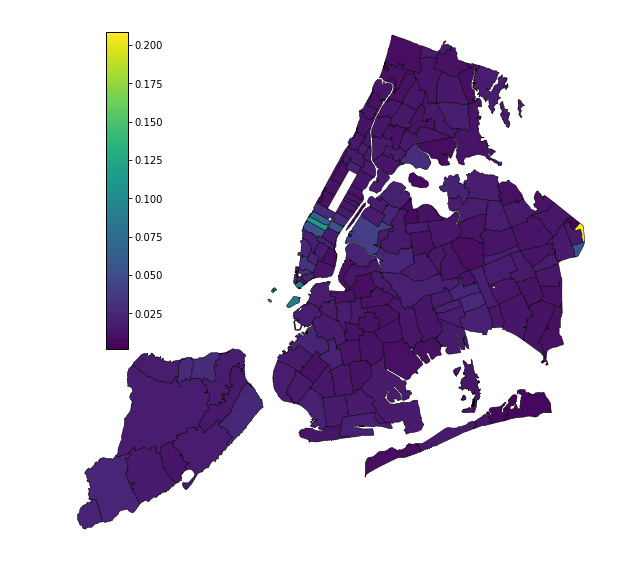

In [274]:
cp.choroplethNYC(zips0_, column="per_capita", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [275]:
zips_.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles', 'Zip',
       'Zips', 'ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'density', 'per_capita'],
      dtype='object')

In [276]:
zips_["zip_density"] = zips_["POPULATION"] / zips_["AREA"]

In [277]:
zips3_ = zips_[zips_["zip_density"]<0.02]

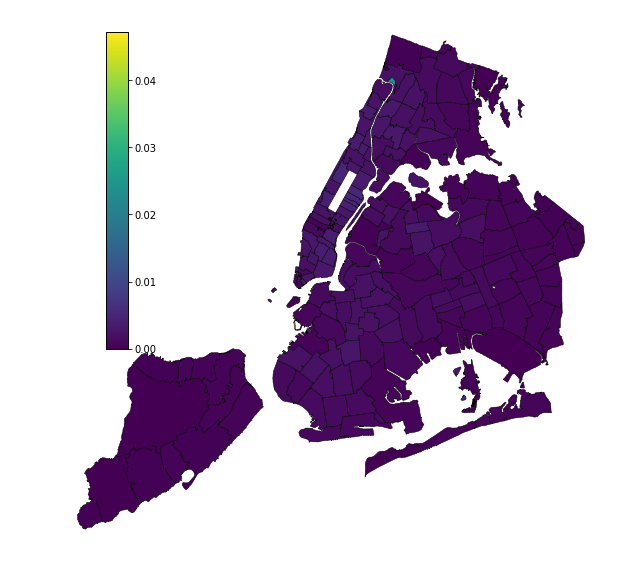

In [278]:
cp.choroplethNYC(zips_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Descriptive population, density and area by CT

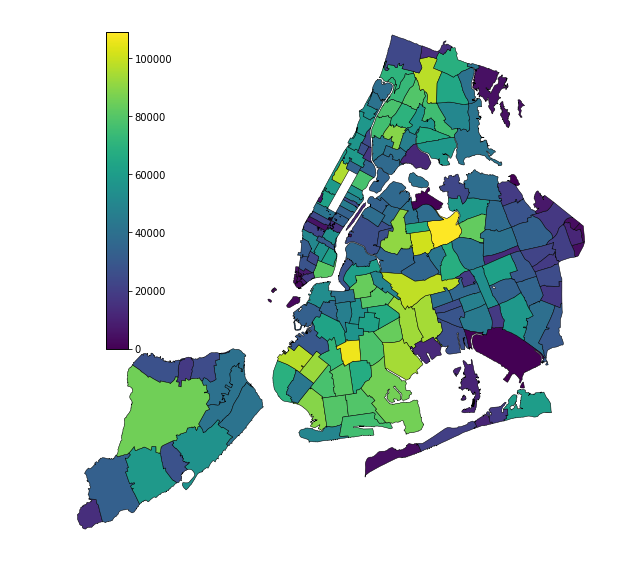

In [279]:
cp.choroplethNYC(zips_, column="POPULATION", color="k",cmap="viridis", edgecolor="k", lw=0.5);

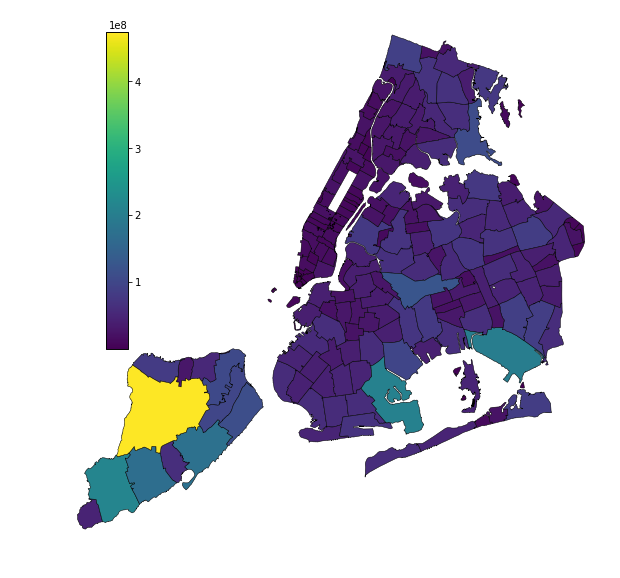

In [280]:
cp.choroplethNYC(zips_, column="AREA", color="k",cmap="viridis", edgecolor="k", lw=0.5);

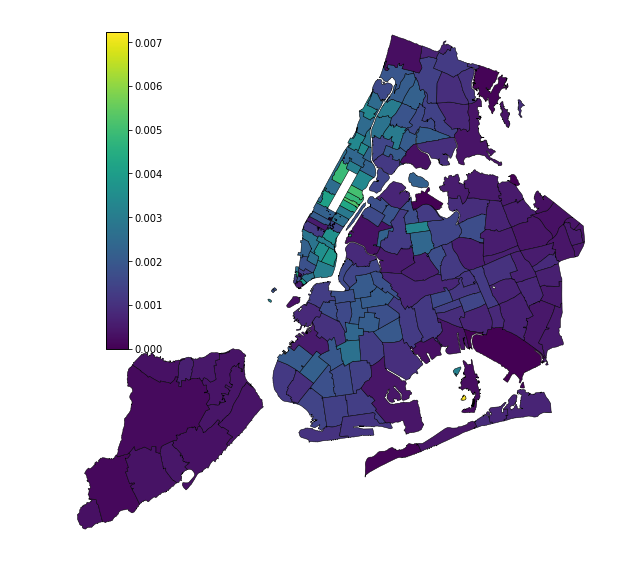

In [281]:
cp.choroplethNYC(zips3_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring building licenses

In [282]:
licenses = pd.read_csv("DOB_Permit_Issuance.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,8,9,10,15,31,33,34,35,36,39,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [283]:
licenses.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

In [437]:
licenses.head()

BOROUGH    Bin # House #       Street Name      Job #  Job doc. #  \
0   BROOKLYN  3326733    1070  EAST  104 STREET  301064023           1   
1   BROOKLYN  3322563     230    HANCOCK STREET  302036375           1   
2  MANHATTAN  1040756     504       PARK AVENUE  100209846           1   
3  MANHATTAN  1036459     570  LEXINGTON AVENUE  101464835           1   
4  MANHATTAN  1015847      25         W. 32 ST.  122488478           1   

  Job Type Self_Cert Block Lot Community Board  Zip Code  Bldg Type  \
0       A2         Y  8230   1             318   11236.0        2.0   
1       A1         Y  1838  43             303   11216.0        1.0   
2       A3       NaN  1374  36             108   10022.0        2.0   
3       A2       NaN  1305  60             105   10022.0        2.0   
4       A2         Y   834  26             105   10001.0        2.0   

  Residential Special District 1 Special District 2 Work Type Permit Status  \
0         NaN                NaN                NaN        OT        ISSUED   
1         YES                NaN                NaN        EQ        ISSUED   
2         YES                NaN                NaN       NaN        ISSUED   
3         NaN                NaN                NaN        PL        ISSUED   
4         NaN                NaN                NaN        MH        ISSUED   

  Filing Status Permit Type  Permit Sequence # Permit Subtype Oil Gas  \
0       RENEWAL          EW                  3             OT     NaN   
1       RENEWAL          EQ                  3             FN     NaN   
2       INITIAL          AL                  1            NaN     NaN   
3       INITIAL          PL                  1            NaN     NaN   
4       RENEWAL          EW                  2             MH     NaN   

        Site Fill Filing Date           Issuance Date Expiration Date  \
0            NONE  09/16/2002  09/16/2002 12:00:00 AM      09/16/2003   
1            NONE  12/07/2012  12/28/2012 12:00:00 AM      11/27/2013   
2            NONE  11/27/1991  11/27/1991 12:00:00 AM      10/01/1992   
3            NONE  03/24/1997  03/24/1997 12:00:00 AM      07/01/1997   
4  NOT APPLICABLE  03/30/2016  03/30/2016 12:00:00 AM      03/30/2017   

  Job Start Date Permittee's First Name Permittee's Last Name  \
0     07/27/2000                   ZAFF                  KHAN   
1     01/26/2006                 ISRAEL               SALGADO   
2     11/27/1991                WILLIAM            PALMADESSA   
3     03/24/1997                 EUGENE              BOCCIERI   
4     09/21/2015                JU YEON                   LEE   

      Permittee's Business Name Permittee's Phone # Permittee's License Type  \
0     IMPERIAL DEVELOPEMENT AND          7188358652                       GC   
1                ISRAEL SALGADO          9175327518                       GC   
2  RED BALL INTERIOR DEMO. CORP          2126751610                      NaN   
3           DUO PLG & HTG. CORP          7189484500                       MP   
4                   DOW CAD INC          3475837527                       GC   

  Permittee's License # Act as Superintendent Permittee's Other Title  \
0               0002593                     Y                     NaN   
1               0604180                   NaN                     NaN   
2                   NaN                     Y                      GC   
3               0000416                     Y                     NaN   
4               0613991                   NaN                     NaN   

  HIC License Site Safety Mgr's First Name Site Safety Mgr's Last Name  \
0         NaN                          NaN                         NaN   
1         NaN                          NaN                         NaN   
2         NaN                          NaN                         NaN   
3         NaN                          NaN                         NaN   
4         NaN                          NaN                         NaN   

  Site Safety Mgr Busine

In [438]:
licenses['Issuance Date'] = pd.to_datetime(licenses['Issuance Date'])

ValueError: Unknown string format

In [440]:
licenses['Issuance Date'].describe() 
#licenses['Expiration Date'] .describe()
#licenses['Job Start Date'].describe()

count                 3323573
unique                   8104
top       2017-03-29 00:00:00
freq                     1096
first     1989-05-11 00:00:00
last      2018-04-04 00:00:00
Name: Issuance Date, dtype: object

In [442]:
licenses = licenses[licenses["Issuance Date"]>'12/31/2013']
licenses = licenses[licenses["Issuance Date"]<'01/01/2018']

In [443]:
licenses['Issuance Date'].describe() 

count                  739850
unique                   1386
top       2017-03-29 00:00:00
freq                     1096
first     2014-01-01 00:00:00
last      2017-12-31 00:00:00
Name: Issuance Date, dtype: object

In [444]:
countzip = licenses.groupby(licenses["Zip Code"]).count()

In [445]:
countzip["Zip"] = countzip.index.astype(int)
countzip["Zips"] = countzip["Zip"].astype(str)
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
zips_ = gp.GeoDataFrame(zips)

In [446]:
print (licenses["Residential"].unique())
print (licenses["Job Type"].unique())
print (licenses["Bldg Type"].unique())

[nan 'YES']
['A2' 'NB' 'A3' 'A1' 'DM' 'SG']
[  2.   1.  nan]


In [447]:
Residential_licenses = licenses[licenses["Residential"]=="YES"]
Non_Residential_licenses = licenses[licenses["Residential"]!="YES"]

big_bldg = licenses[licenses["Bldg Type"]==2]
small_bldg = licenses[licenses["Bldg Type"]==1]

In [448]:
new_buildings = licenses[licenses["Job Type"]=="NB"]
major_renovation = licenses[licenses["Job Type"]=="A1"]

In [449]:
countzip.head(5)

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
Zip Code                                                                      
0.0            32     32       32           32     32          32        32   
4452.0          8      8        8            8      8           8         8   
10000.0        20     20       20           20     20          20        20   
10001.0     13896  13896    13896        13896  13896       13896     13896   
10002.0      8176   8176     8176         8176   8176        8176      8176   

          Self_Cert  Block    Lot  Community Board  Bldg Type  Residential  \
Zip Code                                                                     
0.0              32     32     32               32         32           28   
4452.0            8      8      8                8          8            8   
10000.0          20     20     20               20         20            0   
10001.0       13750  13896  13896            13896      13896         2898   
10002.0        8066   8176   8176             8176       8176         4793   

          Special District 1  Special District 2  Work Type  Permit Status  \
Zip Code                                                                     
0.0                        0                   0         29             32   
4452.0                     0                   0          1              8   
10000.0                    0                   0         19             20   
10001.0                 4526                 700      12532          13894   
10002.0                   16                   0       7494           8155   

          Filing Status  Permit Type  Permit Sequence #  Permit Subtype  \
Zip Code                                                                  
0.0                  32           32                 32              26   
4452.0                8            8                  8               2   
10000.0              20           20                 20              17   
10001.0           13896        13896              13896           10414   
10002.0            8176         8176               8176            5627   

          Oil Gas  Site Fill  Filing Date  Issuance Date  Expiration Date  \
Zip Code                                                                    
0.0             0         30           32             32               32   
4452.0          0          8            8              8                8   
10000.0         1         18           20             20               20   
10001.0        42       9037        13896          13896            13896   
10002.0        33       6264         8176           8176             8176   

          Job Start Date  Permittee's First Name  Permittee's Last Name  \
Zip Code                                                                  
0.0                   32                      32                     32   
4452.0                 8                       8                      8   
10000.0               20                      20                     20   
10001.0            13896                   13896                  13896   
10002.0             8172                    8176                   8176   

          Permittee's Business Name  Permittee's Phone #  \
Zip Code                                                   
0.0                              32                   32   
4452.0                            8                    8   
10000.0                          20                   20   
10001.0                       13894                13896   
10002.0                        8173                 8176   

          Permittee's License Type  Permittee's License #  \
Zip Code                                                    
0.0                             32                     31   
4452.0                           8                      8   
10000.0                         20                     19   
10001.0                      13896          

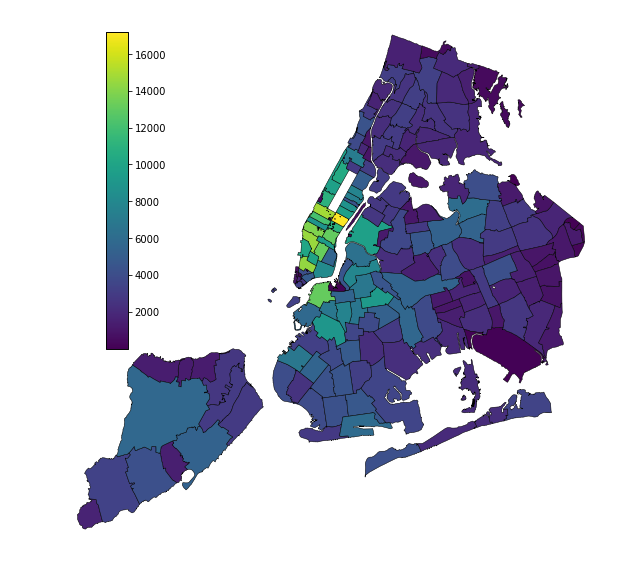

In [450]:
cp.choroplethNYC(zips_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring just residential Licenses

In [451]:
countres = Residential_licenses.groupby(Residential_licenses["Zip Code"]).count()

In [452]:
countres["Zip"] = countres.index.astype(int)
countres["Zips"] = countres["Zip"].astype(str)
res = pd.merge(countres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
res_ = gp.GeoDataFrame(res)

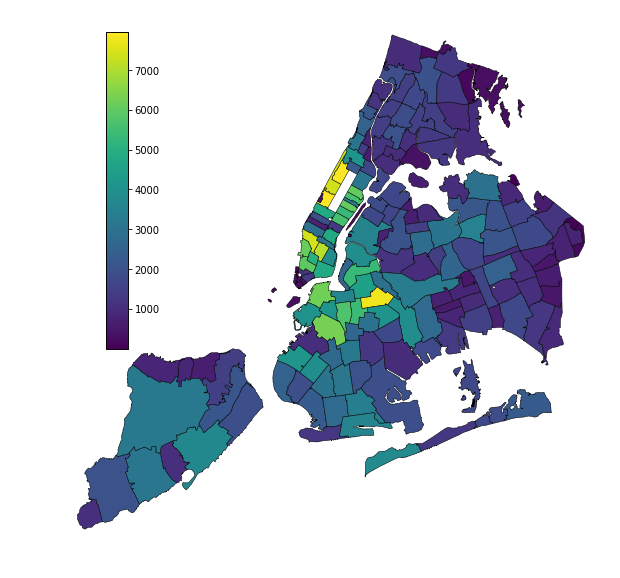

In [453]:
cp.choroplethNYC(res_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Non residential Bldgs

In [454]:
countnonres = Non_Residential_licenses.groupby(Non_Residential_licenses["Zip Code"]).count()

In [455]:
countnonres["Zip"] = countnonres.index.astype(int)
countnonres["Zips"] = countnonres["Zip"].astype(str)
nonres = pd.merge(countnonres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nonres_ = gp.GeoDataFrame(nonres)

In [456]:
Non_Residential_licenses.head()

BOROUGH    Bin # House #         Street Name      Job #  Job doc. #  \
4   MANHATTAN  1015847      25           W. 32 ST.  122488478           1   
8      QUEENS  4311785   87-77       PARSONS BLVD.  440154440           1   
13  MANHATTAN  1089326      49          ANN STREET  120029511           1   
24  MANHATTAN  1014236     282          7TH AVENUE  121895280           2   
30     QUEENS  4437841   59-03  SUMMERFIELD STREET  440227559           1   

   Job Type Self_Cert Block Lot Community Board  Zip Code  Bldg Type  \
4        A2         Y   834  26             105   10001.0        2.0   
8        A2         Y  9765  41             412   11432.0        2.0   
13       A2         N    92  14             101   10038.0        2.0   
24       A2         Y   776  40             105   10001.0        2.0   
30       A3         Y  3588   1             405   11385.0        2.0   

   Residential Special District 1 Special District 2 Work Type Permit Status  \
4          NaN                NaN                NaN        MH        ISSUED   
8          NaN                 DJ                JAM        OT        ISSUED   
13         NaN                 LM                NaN        SP        ISSUED   
24         NaN                NaN                NaN        OT        ISSUED   
30         NaN                NaN                NaN        EQ        ISSUED   

   Filing Status Permit Type  Permit Sequence # Permit Subtype Oil Gas  \
4        RENEWAL          EW                  2             MH     NaN   
8        INITIAL          EW                  1             OT     NaN   
13       RENEWAL          EW                  4             SP     NaN   
24       INITIAL          EW                  1             OT     NaN   
30       INITIAL          EQ                  1             SF     NaN   

         Site Fill Filing Date Issuance Date Expiration Date Job Start Date  \
4   NOT APPLICABLE  03/30/2016    2016-03-30      2017-03-30     09/21/2015   
8   NOT APPLICABLE  08/04/2014    2014-08-04      2015-03-11     08/04/2014   
13  NOT APPLICABLE  02/17/2015    2015-02-17      2016-02-17     02/07/2012   
24             NaN  04/29/2014    2014-04-29      2015-03-31     04/29/2014   
30             NaN  06/17/2015    2015-06-17      2016-06-16     06/17/2015   

   Permittee's First Name Permittee's Last Name  Permittee's Business Name  \
4                 JU YEON                   LEE                DOW CAD INC   
8                 MICHAEL                   KUO          MICHELLE KUO CORP   
13                WILLIAM                HARVEY  ORION PLUMBING & HTG CORP   
24                  AHMAD                 REYAZ  ACS SYSTEM ASSOCIATES INC   
30                WILLIAM                LAFFEY     SPRING SCAFFOLDING LLC   

   Permittee's Phone # Permittee's License Type Permittee's License #  \
4           3475837527                       GC               0613991   
8           7184611229                       GC               0021654   
13          7188880418                       FS               0000832   
24          9146655800                       GC               0014698   
30          7183924921                       GC               0607447   

   Act as Superintendent Permittee's Other Title HIC License  \
4                    NaN                     NaN         NaN   
8                    NaN                     NaN         NaN   
13                   NaN                     NaN         NaN   
24                   NaN                     NaN         NaN   
30                   NaN                     NaN         NaN   

   Site Safety Mgr's First Name Site Safety Mgr's Last Name  \
4                           NaN                         NaN   
8                           NaN                         NaN   
13                          NaN                         NaN   
24                          NaN                         NaN   
30                          NaN                         NaN   

   Site Safety Mgr Business Name Supe

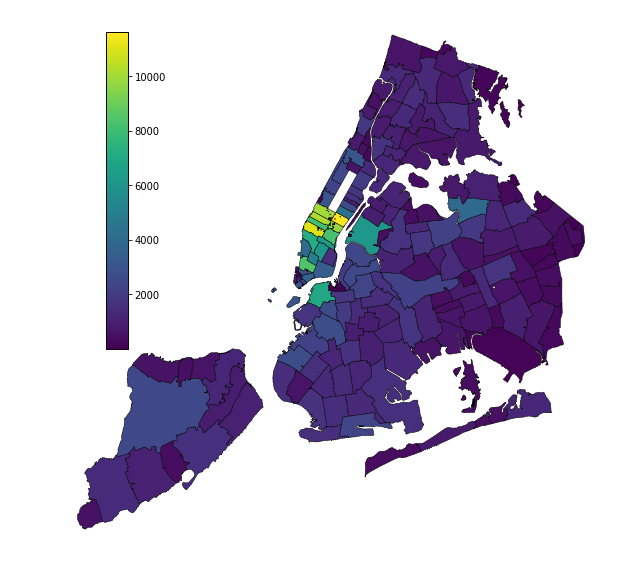

In [457]:
cp.choroplethNYC(nonres_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# New Buildings and Major renoventions

In [458]:
new_buildings_byct = new_buildings.groupby(new_buildings["Zip Code"]).count()
major_renovation_byct = major_renovation.groupby(major_renovation["Zip Code"]).count()

In [459]:
new_buildings_byct["Zip"] = new_buildings_byct.index.astype(int)
new_buildings_byct["Zips"] = new_buildings_byct["Zip"].astype(str)
nb = pd.merge(new_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nb_ = gp.GeoDataFrame(nb)

major_renovation_byct["Zip"] = major_renovation_byct.index.astype(int)
major_renovation_byct["Zips"] = major_renovation_byct["Zip"].astype(str)
mr = pd.merge(major_renovation_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
mr_ = gp.GeoDataFrame(mr)

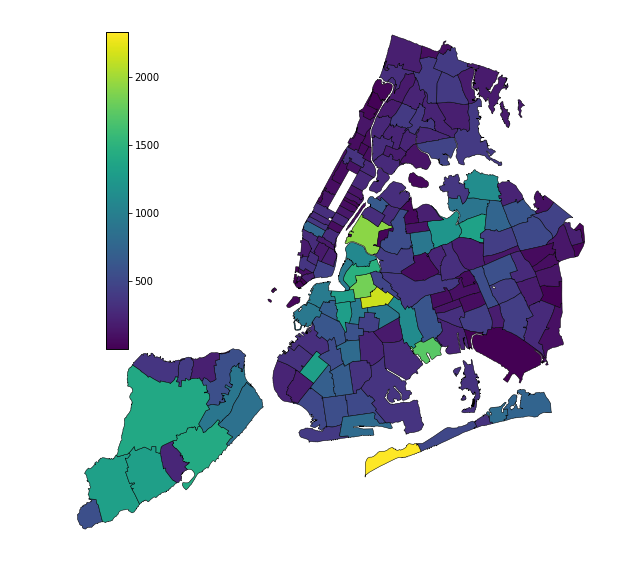

In [460]:
cp.choroplethNYC(nb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

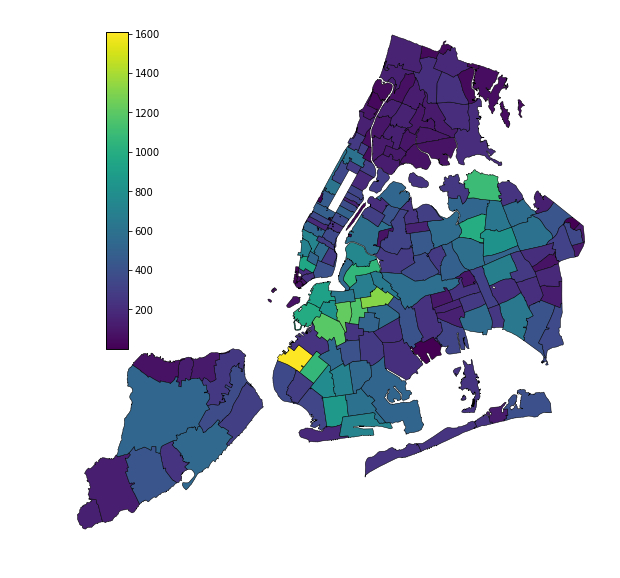

In [461]:
cp.choroplethNYC(mr_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [462]:
nb_["new_buildings_density"] = nb_["BOROUGH"] / nb_["AREA"]
mr_["major_renovation_density"] = mr_["BOROUGH"] / mr_["AREA"]

(array([ 192.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  3.00129559e-08,   1.33506715e-04,   2.66983417e-04,
          4.00460119e-04,   5.33936821e-04,   6.67413522e-04,
          8.00890224e-04,   9.34366926e-04,   1.06784363e-03,
          1.20132033e-03,   1.33479703e-03]),
 <a list of 10 Patch objects>)

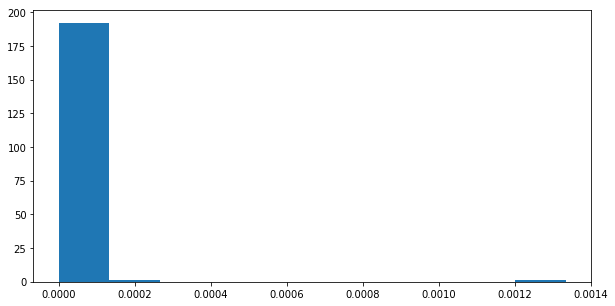

In [463]:
pl.hist(nb_.new_buildings_density)

In [464]:
nb1_ = nb_[nb_["new_buildings_density"]<0.0005]

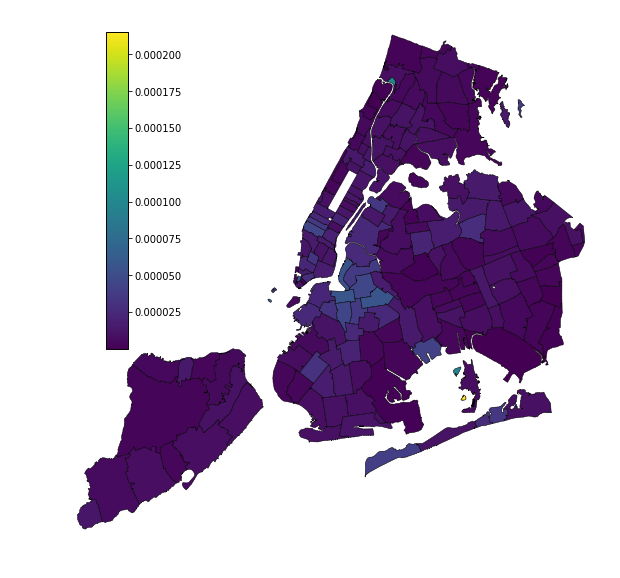

In [465]:
cp.choroplethNYC(nb1_, column="new_buildings_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([ 209.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  7.17795035e-08,   1.40667021e-04,   2.81262263e-04,
          4.21857504e-04,   5.62452746e-04,   7.03047987e-04,
          8.43643229e-04,   9.84238470e-04,   1.12483371e-03,
          1.26542895e-03,   1.40602419e-03]),
 <a list of 10 Patch objects>)

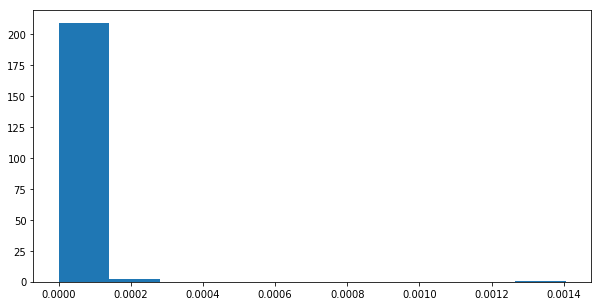

In [466]:
pl.hist(mr_.major_renovation_density)

In [467]:
mr1_ = mr_[mr_["major_renovation_density"]<0.001]

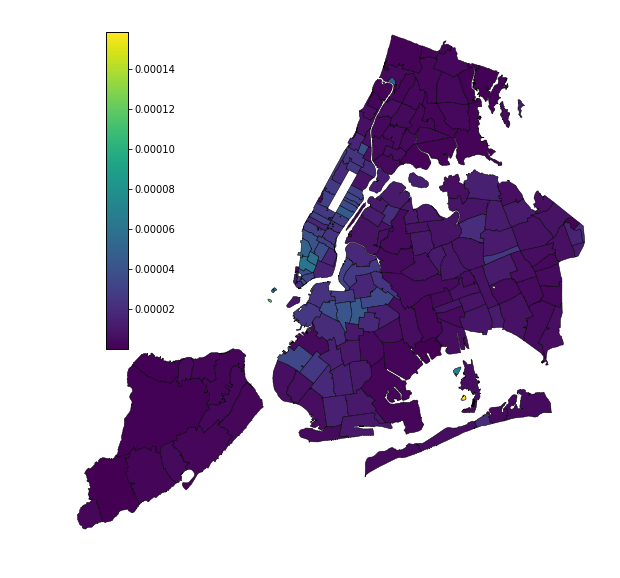

In [468]:
cp.choroplethNYC(mr1_, column="major_renovation_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [469]:
big_buildings_byct = big_bldg.groupby(big_bldg["Zip Code"]).count()
small_buildings_byct = small_bldg.groupby(small_bldg["Zip Code"]).count()

In [470]:
big_buildings_byct["Zip"] = big_buildings_byct.index.astype(int)
big_buildings_byct["Zips"] = big_buildings_byct["Zip"].astype(str)
bb = pd.merge(big_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
bb_ = gp.GeoDataFrame(bb)

small_buildings_byct["Zip"] = small_buildings_byct.index.astype(int)
small_buildings_byct["Zips"] = small_buildings_byct["Zip"].astype(str)
sb = pd.merge(small_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
sb_ = gp.GeoDataFrame(sb)

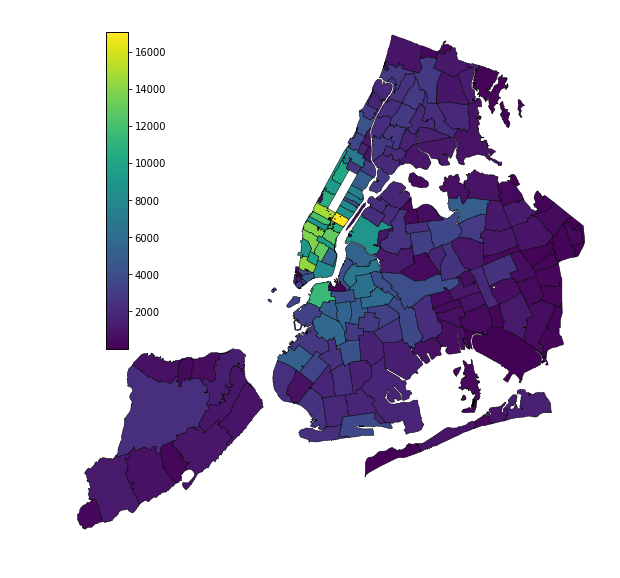

In [471]:
cp.choroplethNYC(bb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

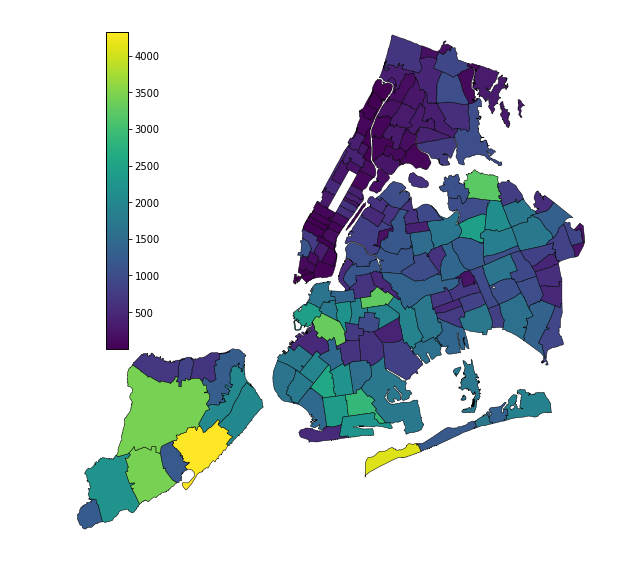

In [472]:
cp.choroplethNYC(sb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Develop the index of gentrification based on business and building licenses

In [473]:
nb_.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0    771.0    771      771          771    771         771       771   
1    461.0    461      461          461    461         461       461   
2    164.0    164      164          164    164         164       164   
3     43.0     43       43           43     43          43        43   
4     43.0     43       43           43     43          43        43   

   Self_Cert  Block  Lot  Community Board  Bldg Type  Residential  \
0        746    771  771              771        771          350   
1        414    461  461              461        461          273   
2        164    164  164              164        164          124   
3         43     43   43               43         43            4   
4         43     43   43               43         43            4   

   Special District 1  Special District 2  Work Type  Permit Status  \
0                 393                  53        248            771   
1                   0                   0        190            453   
2                   0                   0         65            161   
3                  39                   0         10             43   
4                  39                   0         10             43   

   Filing Status  Permit Type  Permit Sequence #  Permit Subtype  Oil Gas  \
0            771          771                771             237        0   
1            461          461                461             139        0   
2            164          164                164              56        0   
3             43           43                 43              11        0   
4             43           43                 43              11        0   

   Site Fill  Filing Date  Issuance Date  Expiration Date  Job Start Date  \
0        655          771            771              771             771   
1        404          461            461              461             457   
2        135          164            164              164             164   
3         39           43             43               43              43   
4         39           43             43               43              43   

   Permittee's First Name  Permittee's Last Name  Permittee's Business Name  \
0                     771                    771                        771   
1                     461                    461                        461   
2                     164                    164                        164   
3                      43                     43                         43   
4                      43                     43                         43   

   Permittee's Phone #  Permittee's License Type  Permittee's License #  \
0                  771                       771                    771   
1                  461                       461                    461   
2                  164                       164                    164   
3                   43                        43                     43   
4                   43                        43                     43   

   Act as Superintendent  Permittee's Other Title  HIC License  \
0                      0                        0            0   
1                      0                        0            0   
2                      0                        0            0   
3                      0                        0            0   
4                      0                        0            0   

   Site Safety Mgr's First Name  Site Safety Mgr's Last Name  \
0                           325                          325   
1                           143                          143   
2                            33                           33   
3                            22                           22   
4                            22                           22   

   Site Safety Mgr Business Name  Superintendent First & Last Name  \
0                       

In [474]:
nb_["count_new_buildings"] = nb_["BOROUGH"]
mr_["count_major_renovation"] = mr_["BOROUGH"]

In [475]:
mr_.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0    522.0    522      522          522    522         522       522   
1    404.0    404      404          404    404         404       404   
2    566.0    566      566          566    566         566       566   
3     76.0     76       76           76     76          76        76   
4     76.0     76       76           76     76          76        76   

   Self_Cert  Block  Lot  Community Board  Bldg Type  Residential  \
0        448    522  522              522        522          124   
1        369    404  404              404        404          184   
2        541    566  566              566        566          344   
3         71     76   76               76         76            6   
4         71     76   76               76         76            6   

   Special District 1  Special District 2  Work Type  Permit Status  \
0                 123                  33        140            521   
1                   0                   0        155            404   
2                  47                   0        199            565   
3                  58                  20         18             76   
4                  58                  20         18             76   

   Filing Status  Permit Type  Permit Sequence #  Permit Subtype  Oil Gas  \
0            522          522                522              47        0   
1            404          404                404              62        0   
2            566          566                566              57        0   
3             76           76                 76               3        0   
4             76           76                 76               3        0   

   Site Fill  Filing Date  Issuance Date  Expiration Date  Job Start Date  \
0        466          522            522              522             522   
1        359          404            404              404             404   
2        478          566            566              566             566   
3         63           76             76               76              76   
4         63           76             76               76              76   

   Permittee's First Name  Permittee's Last Name  Permittee's Business Name  \
0                     522                    522                        521   
1                     404                    404                        404   
2                     566                    566                        566   
3                      76                     76                         76   
4                      76                     76                         76   

   Permittee's Phone #  Permittee's License Type  Permittee's License #  \
0                  522                       522                    521   
1                  404                       404                    404   
2                  566                       566                    566   
3                   76                        76                     76   
4                   76                        76                     76   

   Act as Superintendent  Permittee's Other Title  HIC License  \
0                      0                        4            9   
1                      0                        1            2   
2                      0                        3            7   
3                      0                        1            0   
4                      0                        1            0   

   Site Safety Mgr's First Name  Site Safety Mgr's Last Name  \
0                            33                           33   
1                             8                            8   
2                            34                           34   
3                             3                            3   
4                             3                            3   

   Site Safety Mgr Business Name  Superintendent First & Last Name  \
0                       

In [476]:
mr_.shape

(212, 76)

In [477]:
mr_.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Bldg Type',
       'Residential', 'Special District 1', 'Special District 2', 'Work Type',
       'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence #',
       'Permit Subtype', 'Oil Gas', 'Site Fill', 'Filing Date',
       'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
       'Owner

In [478]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

In [479]:
Major_Renovation_ = mr_[["ZIPCODE", "POPULATION","AREA","COUNTY","count_major_renovation", "geometry"]]
New_Building_ = nb_[["ZIPCODE", "count_new_buildings"]]
Businesses_ = df_[["ZIPCODE_y", "n/o"]] 

In [480]:
print(Major_Renovation_.shape)
print(New_Building_.shape)
print(Businesses_.shape)

(212, 6)
(194, 2)
(261, 2)


In [481]:
countzip.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
Zip Code                                                                      
0.0            32     32       32           32     32          32        32   
4452.0          8      8        8            8      8           8         8   
10000.0        20     20       20           20     20          20        20   
10001.0     13896  13896    13896        13896  13896       13896     13896   
10002.0      8176   8176     8176         8176   8176        8176      8176   

          Self_Cert  Block    Lot  Community Board  Bldg Type  Residential  \
Zip Code                                                                     
0.0              32     32     32               32         32           28   
4452.0            8      8      8                8          8            8   
10000.0          20     20     20               20         20            0   
10001.0       13750  13896  13896            13896      13896         2898   
10002.0        8066   8176   8176             8176       8176         4793   

          Special District 1  Special District 2  Work Type  Permit Status  \
Zip Code                                                                     
0.0                        0                   0         29             32   
4452.0                     0                   0          1              8   
10000.0                    0                   0         19             20   
10001.0                 4526                 700      12532          13894   
10002.0                   16                   0       7494           8155   

          Filing Status  Permit Type  Permit Sequence #  Permit Subtype  \
Zip Code                                                                  
0.0                  32           32                 32              26   
4452.0                8            8                  8               2   
10000.0              20           20                 20              17   
10001.0           13896        13896              13896           10414   
10002.0            8176         8176               8176            5627   

          Oil Gas  Site Fill  Filing Date  Issuance Date  Expiration Date  \
Zip Code                                                                    
0.0             0         30           32             32               32   
4452.0          0          8            8              8                8   
10000.0         1         18           20             20               20   
10001.0        42       9037        13896          13896            13896   
10002.0        33       6264         8176           8176             8176   

          Job Start Date  Permittee's First Name  Permittee's Last Name  \
Zip Code                                                                  
0.0                   32                      32                     32   
4452.0                 8                       8                      8   
10000.0               20                      20                     20   
10001.0            13896                   13896                  13896   
10002.0             8172                    8176                   8176   

          Permittee's Business Name  Permittee's Phone #  \
Zip Code                                                   
0.0                              32                   32   
4452.0                            8                    8   
10000.0                          20                   20   
10001.0                       13894                13896   
10002.0                        8173                 8176   

          Permittee's License Type  Permittee's License #  \
Zip Code                                                    
0.0                             32                     31   
4452.0                           8                      8   
10000.0                         20                     19   
10001.0                      13896          

In [482]:
type(countzip.Zip.iloc[1])

numpy.int64

In [483]:
countzip["Zip"] = countzip["Zip"].astype(str)

In [484]:
ultimate_df = pd.merge(Major_Renovation_, New_Building_, on = "ZIPCODE")
ultimate_df = pd.merge(Businesses_, ultimate_df, right_on = "ZIPCODE", left_on = "ZIPCODE_y")
ultimate_df = pd.merge(countzip, ultimate_df, right_on = "ZIPCODE", left_on = "Zip")

In [485]:
ultimate_df.shape

(830, 70)

In [486]:
len(ultimate_df.ZIPCODE_y.unique())

180

In [487]:
ultimate_df.head(10)

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0    13896  13896    13896        13896  13896       13896     13896   
1     8176   8176     8176         8176   8176        8176      8176   
2    13230  13230    13230        13230  13230       13230     13230   
3     3343   3343     3343         3343   3343        3343      3343   
4     3343   3343     3343         3343   3343        3343      3343   
5     3343   3343     3343         3343   3343        3343      3343   
6     3343   3343     3343         3343   3343        3343      3343   
7     3343   3343     3343         3343   3343        3343      3343   
8     3343   3343     3343         3343   3343        3343      3343   
9     3343   3343     3343         3343   3343        3343      3343   

   Self_Cert  Block    Lot  Community Board  Bldg Type  Residential  \
0      13750  13896  13896            13896      13896         2898   
1       8066   8176   8176             8176       8176         4793   
2      13139  13230  13230            13230      13228         7110   
3       3322   3343   3343             3343       3343          281   
4       3322   3343   3343             3343       3343          281   
5       3322   3343   3343             3343       3343          281   
6       3322   3343   3343             3343       3343          281   
7       3322   3343   3343             3343       3343          281   
8       3322   3343   3343             3343       3343          281   
9       3322   3343   3343             3343       3343          281   

   Special District 1  Special District 2  Work Type  Permit Status  \
0                4526                 700      12532          13894   
1                  16                   0       7494           8155   
2                1059                 101      12463          13220   
3                2183                 787       3205           3343   
4                2183                 787       3205           3343   
5                2183                 787       3205           3343   
6                2183                 787       3205           3343   
7                2183                 787       3205           3343   
8                2183                 787       3205           3343   
9                2183                 787       3205           3343   

   Filing Status  Permit Type  Permit Sequence #  Permit Subtype  Oil Gas  \
0          13896        13896              13896           10414       42   
1           8176         8176               8176            5627       33   
2          13230        13230              13230            9487       89   
3           3343         3343               3343            2621        5   
4           3343         3343               3343            2621        5   
5           3343         3343               3343            2621        5   
6           3343         3343               3343            2621        5   
7           3343         3343               3343            2621        5   
8           3343         3343               3343            2621        5   
9           3343         3343               3343            2621        5   

   Site Fill  Filing Date  Issuance Date  Expiration Date  Job Start Date  \
0       9037        13896          13896            13896           13896   
1       6264         8176           8176             8176            8172   
2       9386        13230          13230            13230           13230   
3       1934         3343           3343             3343            3343   
4       1934         3343           3343             3343            3343   
5       1934         3343           3343             3343            3343   
6       1934         3343           3343             3343            3343   
7       1934         3343           3343             3343            3343   
8       1934         3343           3343             3343            3343   
9       1934         3343   

In [488]:
ultimate_df = ultimate_df.drop_duplicates("ZIPCODE")

# INDEX

### Gent = (K * N/0) * ((1.5 * NB + MR) / Area ** 0.5)

In [489]:
ultimate_df.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0      13896  13896    13896        13896  13896       13896     13896   
1       8176   8176     8176         8176   8176        8176      8176   
2      13230  13230    13230        13230  13230       13230     13230   
3       3343   3343     3343         3343   3343        3343      3343   
259     2735   2735     2735         2735   2735        2735      2735   

     Self_Cert  Block    Lot  Community Board  Bldg Type  Residential  \
0        13750  13896  13896            13896      13896         2898   
1         8066   8176   8176             8176       8176         4793   
2        13139  13230  13230            13230      13228         7110   
3         3322   3343   3343             3343       3343          281   
259       2706   2735   2735             2735       2735          422   

     Special District 1  Special District 2  Work Type  Permit Status  \
0                  4526                 700      12532          13894   
1                    16                   0       7494           8155   
2                  1059                 101      12463          13220   
3                  2183                 787       3205           3343   
259                1694                 548       2654           2735   

     Filing Status  Permit Type  Permit Sequence #  Permit Subtype  Oil Gas  \
0            13896        13896              13896           10414       42   
1             8176         8176               8176            5627       33   
2            13230        13230              13230            9487       89   
3             3343         3343               3343            2621        5   
259           2735         2735               2735            2199        2   

     Site Fill  Filing Date  Issuance Date  Expiration Date  Job Start Date  \
0         9037        13896          13896            13896           13896   
1         6264         8176           8176             8176            8172   
2         9386        13230          13230            13230           13230   
3         1934         3343           3343             3343            3343   
259       1643         2735           2735             2735            2735   

     Permittee's First Name  Permittee's Last Name  Permittee's Business Name  \
0                     13896                  13896                      13894   
1                      8176                   8176                       8173   
2                     13230                  13230                      13226   
3                      3343                   3343                       3343   
259                    2735                   2735                       2735   

     Permittee's Phone #  Permittee's License Type  Permittee's License #  \
0                  13896                     13896                  13886   
1                   8176                      8176                   8170   
2                  13230                     13230                  13220   
3                   3343                      3343                   3343   
259                 2735                      2735                   2735   

     Act as Superintendent  Permittee's Other Title  HIC License  \
0                        0                        9           90   
1                        0                        5           16   
2                        0                        5           48   
3                        0                        2            4   
259                      0                        1            0   

     Site Safety Mgr's First Name  Site Safety Mgr's Last Name  \
0                             566                          566   
1                             259                          259   
2                             143                          143   
3                              58                           58   
259                            89          

In [490]:
ultimate_df["renovation_index"] = 1000000 * ultimate_df["n/o"] * (ultimate_df["count_new_buildings"]  + ultimate_df["count_major_renovation"]) / (ultimate_df["AREA"]**0.5 * ultimate_df.BOROUGH)
                                   
                                   
                                   
                                   

In [491]:
ultimate_df.shape

(180, 71)

In [492]:
ultimate_df_ = gp.GeoDataFrame(ultimate_df)

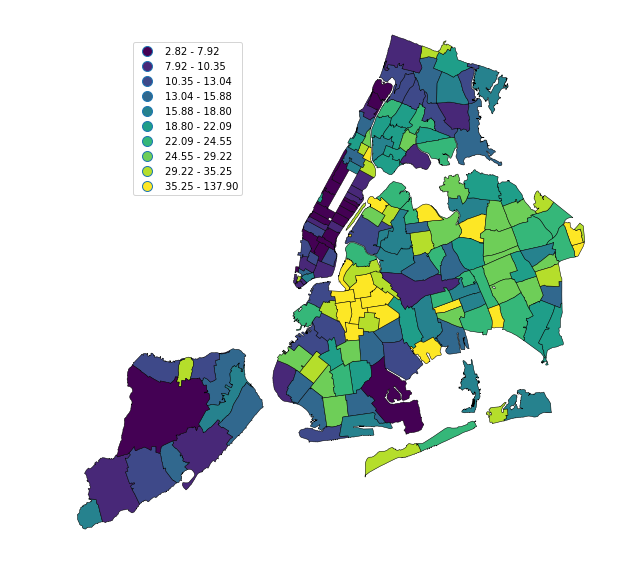

In [493]:
cp.choroplethNYC(ultimate_df_, column="renovation_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");





# Read Zillow rent prices

In [494]:
rent_price = pd.read_csv("Zip_rent.csv")

In [495]:
rent_price.head()

RegionID  RegionName         City State              Metro CountyName  \
0     61639       10025     New York    NY           New York   New York   
1     84654       60657      Chicago    IL            Chicago       Cook   
2     61637       10023     New York    NY           New York   New York   
3     90668       75070     McKinney    TX  Dallas-Fort Worth     Collin   
4     91982       77494  Cinco Ranch    TX            Houston  Fort Bend   

   SizeRank  2010-11  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  \
0         1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1         2   1731.0   1742.0   1750.0   1750.0   1740.0   1733.0   1724.0   
2         3      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3         4   1577.0   1576.0   1582.0   1584.0   1586.0   1585.0   1584.0   
4         5   2184.0   2185.0   2181.0   2184.0   2193.0   2211.0   2222.0   

   2011-06  2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  2012-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN   2963.0   2970.0   
1   1719.0   1712.0   1722.0   1742.0   1759.0   1774.0   1782.0   1781.0   
2      NaN      NaN      NaN      NaN      NaN      NaN   3212.0   3183.0   
3   1584.0   1589.0   1597.0   1604.0   1612.0   1620.0   1627.0   1628.0   
4   2223.0   2224.0   2241.0   2270.0   2308.0   2327.0   2325.0   2299.0   

   2012-02  2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  2012-09  \
0   2997.0   3012.0   3010.0   2997.0   2979.0   2975.0   3013.0   3064.0   
1   1782.0   1783.0   1794.0   1804.0   1806.0   1813.0   1804.0   1799.0   
2   3208.0   3240.0   3267.0   3291.0   3286.0   3288.0   3302.0   3334.0   
3   1629.0   1633.0   1639.0   1646.0   1652.0   1660.0   1667.0   1673.0   
4   2265.0   2247.0   2245.0   2270.0   2308.0   2347.0   2354.0   2340.0   

   2012-10  2012-11  2012-12  2013-01  2013-02  2013-03  2013-04  2013-05  \
0   3085.0   3082.0   3111.0   3151.0   3165.0   3168.0   3182.0   3225.0   
1   1792.0   1801.0   1806.0   1814.0   1820.0   1837.0   1855.0   1876.0   
2   3354.0   3347.0   3343.0   3334.0   3313.0   3336.0   3375.0   3445.0   
3   1677.0   1683.0   1687.0   1692.0   1698.0   1703.0   1708.0   1715.0   
4   2303.0   2277.0   2270.0   2290.0   2317.0   2344.0   2361.0   2371.0   

   2013-06  2013-07  2013-08  2013-09  2013-10  2013-11  2013-12  2014-01  \
0   3272.0   3297.0   3257.0   3211.0   3215.0   3238.0   3296.0   3338.0   
1   1889.0   1908.0   1922.0   1922.0   1913.0   1906.0   1910.0   1921.0   
2   3465.0   3477.0   3438.0   3428.0   3441.0   3484.0   3555.0   3601.0   
3   1723.0   1733.0   1738.0   1746.0   1751.0   1757.0   1762.0   1770.0   
4   2375.0   2376.0   2376.0   2380.0   2398.0   2425.0   2459.0   2486.0   

   2014-02  2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  \
0   3381.0   3398.0   3381.0   3376.0   3361.0   3384.0   3409.0   3450.0   
1   1935.0   1941.0   1943.0   1944.0   1945.0   1951.0   1965.0   1987.0   
2   3614.0   3581.0   3550.0   3557.0   3562.0   3599.0   3647.0   3713.0   
3   1779.0   1785.0   1789.0   1790.0   1790.0   1791.0   1795.0   1804.0   
4   2504.0   2511.0   2509.0   2502.0   2497.0   2492.0   2498.0   2510.0   

   2014-10  2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  \
0   3491.0   3537.0   3543.0   3541.0   3551.0   3585.0   3655.0   3694.0   
1   2006.0   2032.0   2039.0   2035.0   2027.0   2018.0   2009.0   1995.0   
2   3813.0   3904.0   3974.0   4012.0   4059.0   4059.0   4069.0   4039.0   
3   1811.0   1822.0   1833.0   1843.0   1856.0   1869.0   1886.0   1895.0   
4   2519.0   2517.0   2511.0   2509.0   2510.0   2513.0   2511.0   2509.0   

   2015-06  2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  \
0   3730.0   3715.0   3718.0   3706.0   3675.0   3641.0   3618.0     3623   
1   1988.0   1978.0   1959.0   1942.0   1938.0   1938.0   1945.0     1961   
2   4084.0   4083.0   4099.0   4053.0   3974.0   3925.0   3897.0    

In [496]:
rent_price.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01',

In [497]:
print (type(rent_price.RegionName.iloc[2]))
print (type(ultimate_df_.ZIPCODE.iloc[2]))

<class 'numpy.int64'>
<class 'str'>


In [498]:
rent_price["ZIPCODE"] = rent_price.RegionName.astype(str)

In [499]:
final_index_data = pd.merge(rent_price, ultimate_df_, on = "ZIPCODE")

In [500]:
ultimate_df_.shape

(180, 71)

In [501]:
final_index_data.shape

(161, 166)

In [502]:
final_index_data["increase_3_year"] = final_index_data["2017-12"] / final_index_data["2014-12"] 
final_index_data["increase_2_year"] = final_index_data["2017-12"] / final_index_data["2015-12"] 

In [503]:
final_index_data_ = gp.GeoDataFrame(final_index_data)

### Gent = (K x N/0) x (Rent(2017-12) / Rent(2014-12)) x ((1.5 * NB + MR) / Area ^ 0.5)

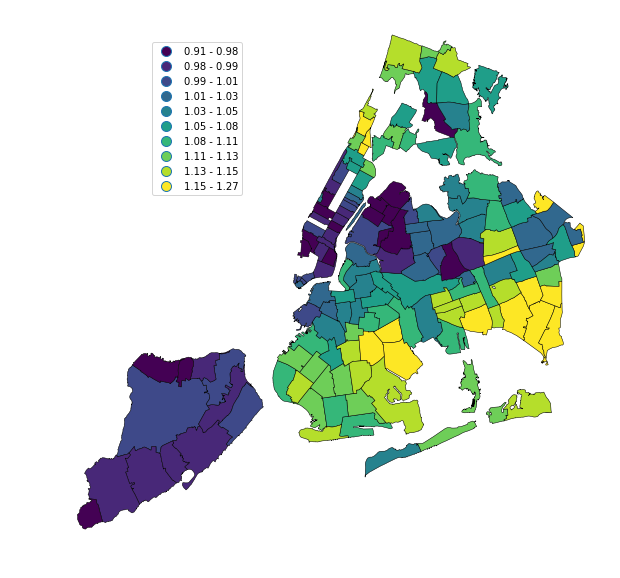

In [504]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


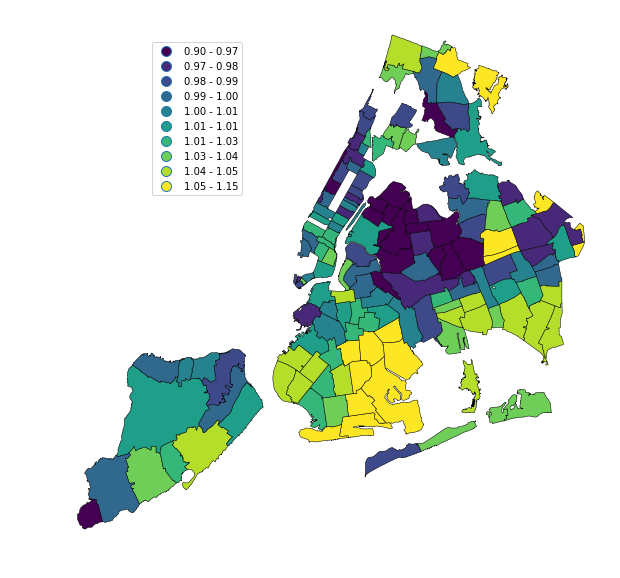

In [505]:
cp.choroplethNYC(final_index_data_, column="increase_2_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


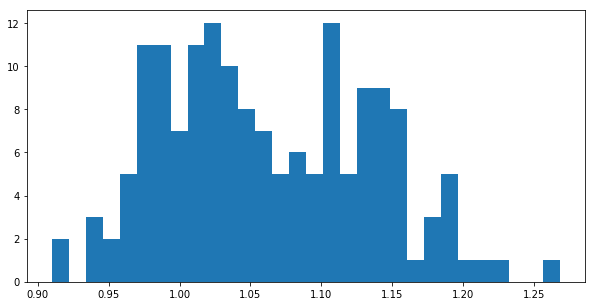

In [506]:
pl.hist(final_index_data_.increase_3_year, bins=30);

In [507]:
final_index_data_["renovation_index_with_rent"] = 100000 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] * 1.5 + final_index_data_["count_major_renovation"]) / (final_index_data_["AREA"]**0.5 * final_index_data.BOROUGH)




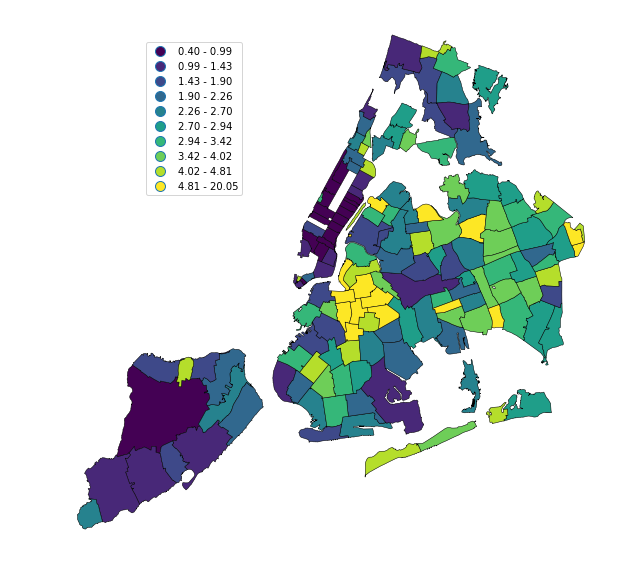

In [508]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


# Now we try to do it with home value instead of rent

In [509]:
home_value = pd.read_csv("Zip_home_value.csv")

In [510]:
home_value.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02'],
      dtype='object', length=270)

In [511]:
print (type(home_value.RegionName.iloc[2]))
print (type(ultimate_df_.ZIPCODE.iloc[2]))

<class 'numpy.int64'>
<class 'str'>


In [512]:
home_value["ZIPCODE"] = home_value.RegionName.astype(str)

In [513]:
final_index_data1 = pd.merge(home_value, ultimate_df_, on = "ZIPCODE")

In [514]:
final_index_data1["increase_3_year"] = final_index_data1["2017-12"] / final_index_data1["2014-12"] 
final_index_data1["increase_2_year"] = final_index_data1["2017-12"] / final_index_data1["2015-12"] 

In [515]:
final_index_data_ = gp.GeoDataFrame(final_index_data)

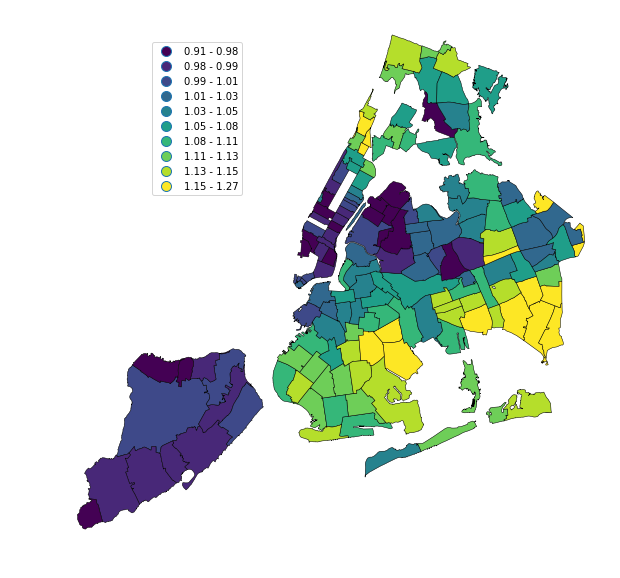

In [516]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


In [517]:
final_index_data_["renovation_index_with_rent"] = 1000000 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] + final_index_data_["count_major_renovation"]) / (final_index_data_["AREA"]**0.5 * final_index_data_.BOROUGH)


Text(0.5,1,'Gentrification Index in NYC by Zip Code\n')

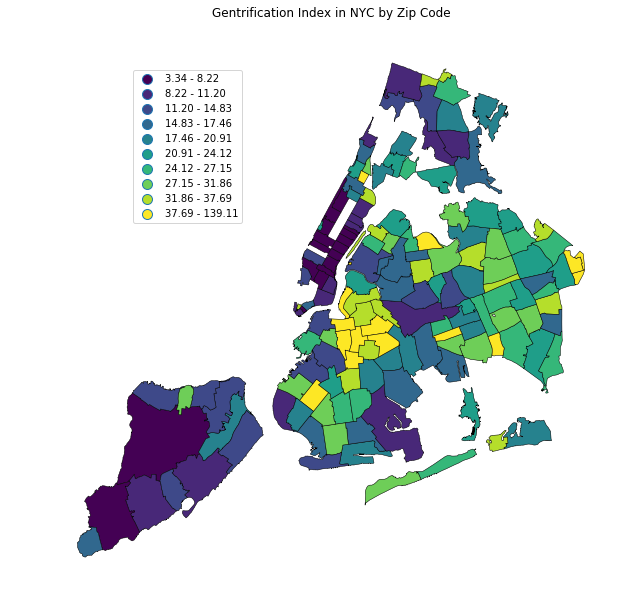

In [518]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");
pl.title("Gentrification Index in NYC by Zip Code\n")

In [519]:
licenses.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

# VALIDATION

In [520]:
furman = pd.read_csv("https://raw.githubusercontent.com/CUSPcapstones/Digital-Traces-of-Gentrification_2018/master/notebooks/ReproduceMapGentrification/gentrification.csv?token=AcyV_MmQyE43GMRcnkRyDKpGFuTLq2kRks5bGWWpwA%3D%3D")




In [521]:
furman.describe()

Unnamed: 0       zipcode  gentrification
count  237.000000    237.000000      237.000000
mean   118.000000  10624.603376        1.717300
std     68.560193    986.583432        0.560187
min      0.000000     83.000000        0.000000
25%     59.000000  10120.000000        2.000000
50%    118.000000  10468.000000        2.000000
75%    177.000000  11241.000000        2.000000
max    236.000000  11697.000000        2.000000

In [522]:
furman_useful = furman[furman["gentrification"]!=2]

In [523]:
furman_useful.describe()

Unnamed: 0       zipcode  gentrification
count   54.000000     54.000000       54.000000
mean   108.462963  10672.351852        0.759259
std     54.567498    511.874253        0.431548
min      6.000000  10002.000000        0.000000
25%     41.250000  10039.250000        1.000000
50%    120.000000  10470.000000        1.000000
75%    151.750000  11213.750000        1.000000
max    197.000000  11370.000000        1.000000

In [524]:
furman_useful.head()

Unnamed: 0  zipcode  gentrification
6            6    10002               1
7            7    10003               1
12          12    10009               1
28          28    10026               1
29          29    10027               1

In [525]:
final_index_data.ZIPCODE.head()

0    10025
1    10023
2    10002
3    10467
4    11226
Name: ZIPCODE, dtype: object

In [526]:
print (type(furman_useful.zipcode.iloc[1]))
print (type(final_index_data_.ZIPCODE.iloc[1]))

<class 'numpy.int64'>
<class 'str'>


In [527]:
furman_useful["ZIPCODE"] = furman_useful.zipcode.astype(str)
furman["ZIPCODE"] = furman.zipcode.astype(str)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [528]:
validation = pd.merge(furman, final_index_data_, on = "ZIPCODE")

In [529]:
validation.head()

Unnamed: 0  zipcode  gentrification ZIPCODE  RegionID  RegionName  \
0           5    10001               2   10001     61615       10001   
1           6    10002               1   10002     61616       10002   
2           7    10003               1   10003     61617       10003   
3           8    10004               2   10004     61618       10004   
4           9    10005               2   10005     61619       10005   

       City State     Metro CountyName  SizeRank  2010-11  2010-12  2011-01  \
0  New York    NY  New York   New York      1786      NaN      NaN      NaN   
1  New York    NY  New York   New York         9      NaN      NaN      NaN   
2  New York    NY  New York   New York        45      NaN      NaN      NaN   
3  New York    NY  New York   New York     11103      NaN      NaN      NaN   
4  New York    NY  New York   New York      7161      NaN      NaN      NaN   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0      NaN      NaN   3291.0   3264.0   3283.0   3310.0   3343.0   3359.0   
1      NaN      NaN   3091.0   3088.0   3113.0   3111.0   3129.0   3161.0   
2      NaN      NaN   3337.0   3286.0   3286.0   3313.0   3336.0   3362.0   
3      NaN      NaN   3509.0   3515.0   3558.0   3572.0   3596.0   3628.0   
4      NaN      NaN   3336.0   3331.0   3358.0   3370.0   3405.0   3428.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   3344.0   3336.0   3350.0   3375.0   3412.0   3411.0   3420.0   3408.0   
1   3190.0   3208.0   3221.0   3230.0   3250.0   3266.0   3270.0   3265.0   
2   3362.0   3368.0   3385.0   3405.0   3424.0   3421.0   3418.0   3406.0   
3   3637.0   3649.0   3646.0   3669.0   3690.0   3673.0   3675.0   3612.0   
4   3435.0   3439.0   3441.0   3452.0   3486.0   3516.0   3545.0   3514.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3387.0   3369.0   3380.0   3432.0   3467.0   3481.0   3452.0   3470.0   
1   3245.0   3241.0   3249.0   3284.0   3309.0   3296.0   3256.0   3228.0   
2   3381.0   3366.0   3388.0   3462.0   3524.0   3525.0   3478.0   3480.0   
3   3574.0   3560.0   3600.0   3666.0   3692.0   3703.0   3668.0   3660.0   
4   3490.0   3476.0   3488.0   3516.0   3526.0   3532.0   3505.0   3497.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3523.0   3578.0   3629.0   3647.0   3657.0   3624.0   3614.0   3613.0   
1   3263.0   3323.0   3380.0   3407.0   3427.0   3434.0   3446.0   3451.0   
2   3539.0   3611.0   3667.0   3694.0   3702.0   3660.0   3647.0   3654.0   
3   3667.0   3684.0   3702.0   3748.0   3797.0   3824.0   3816.0   3783.0   
4   3507.0   3527.0   3528.0   3534.0   3567.0   3605.0   3627.0   3604.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3619.0   3649.0   3705.0   3744.0   3815.0   3880.0   3945.0   3998.0   
1   3459.0   3506.0   3571.0   3639.0   3719.0   3784.0   3836.0   3865.0   
2   3668.0   3716.0   3788.0   3866.0   3990.0   4110.0   4226.0   4282.0   
3   3787.0   3830.0   3918.0   3958.0   3995.0   4055.0   4101.0   4138.0   
4   3611.0   3632.0   3702.0   3733.0   3798.0   3831.0   3860.0   3876.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   4062.0   4109.0   4125.0   4097.0   4085.0   4058.0   4055.0   4042.0   
1   3900.0   3913.0   3924.0   3911.0   3908.0   3889.0   3886.0   3864.0   
2   4349.0   4392.0   4408.0   4364.0   4343.0   4334.0   4353.0   4329.0   
3   4145.

In [530]:
validation["Total_Licenses"] = validation["BOROUGH"]

In [531]:
validation = gp.GeoDataFrame(validation)

Text(0.5,1,'Furman')

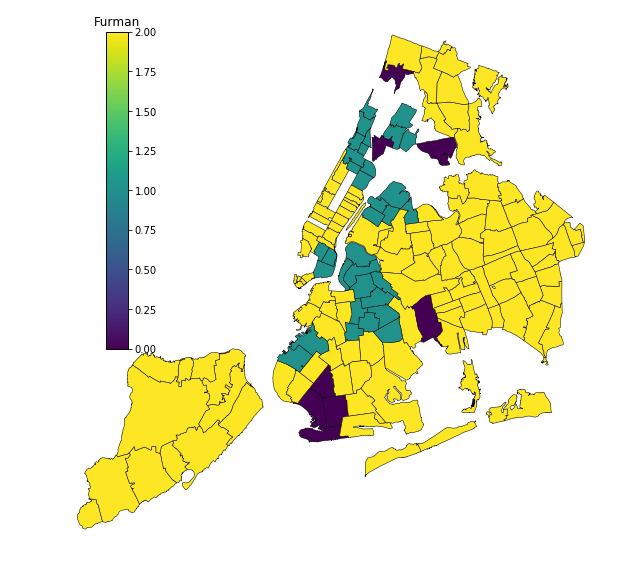

In [532]:
cp.choroplethNYC(validation, column="gentrification", color="k",cmap="viridis", edgecolor="k", lw=0.5);
pl.title("Furman")

In [533]:
validation.gentrification.value_counts()

2.0    120
1.0     33
0.0      8
Name: gentrification, dtype: int64

In [534]:
from sklearn.linear_model import LogisticRegression

In [535]:
validation1  = validation[validation["gentrification"]!=2]

In [536]:
validation1.shape

(41, 173)

In [537]:
X = validation1.renovation_index_with_rent
Y = validation1.gentrification

In [538]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464170
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            0
Date:                Mon, 04 Jun 2018   Pseudo R-squ.:                 0.05956
Time:                        15:46:50   Log-Likelihood:                -19.031
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
renovation_index_with_rent     0.0606      0.017      3.494      0.000      

In [539]:
pd.set_option('display.max_columns', None)

In [540]:
cols=["n/o", "increase_3_year", "count_major_renovation", "count_new_buildings", "AREA", "POPULATION", "Total_Licenses"] 
X1=validation1[cols]
Y1=validation1['gentrification']

In [541]:
logit_model1=sm.Logit(Y1,X1)
result=logit_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.176571
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Jun 2018   Pseudo R-squ.:                  0.6423
Time:                        15:46:50   Log-Likelihood:                -7.2394
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                 0.0002233
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
n/o                       16.9204      8.737      1.937      0.053        -0.203    

In [542]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [543]:
data_final_vars=validation1.columns.values.tolist()
Y=['gentrification']
X=["count_major_renovation", "n/o", "count_new_buildings", "increase_3_year", "increase_2_year", "AREA", "POPULATION"]

In [544]:
logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(validation1[X], validation1[Y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [545]:
cols=["n/o", "increase_3_year", "count_major_renovation", "count_new_buildings", "AREA", "POPULATION", "increase_2_year"] 
X2=validation1[cols]
Y2=validation1['gentrification']

In [546]:
logit_model2=sm.Logit(Y2,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464170
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            0
Date:                Mon, 04 Jun 2018   Pseudo R-squ.:                 0.05956
Time:                        15:46:50   Log-Likelihood:                -19.031
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
renovation_index_with_rent     0.0606      0.017      3.494      0.000      

In [547]:
validation1.gentrification.mean()

0.80487804878048785

In [548]:
X = validation1.renovation_index_with_rent
Y = validation1.gentrification

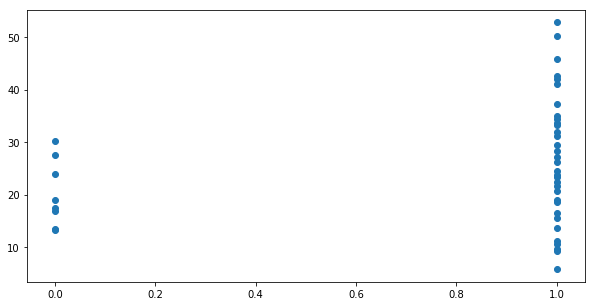

In [549]:
pl.scatter(validation1.gentrification, validation1.renovation_index_with_rent)

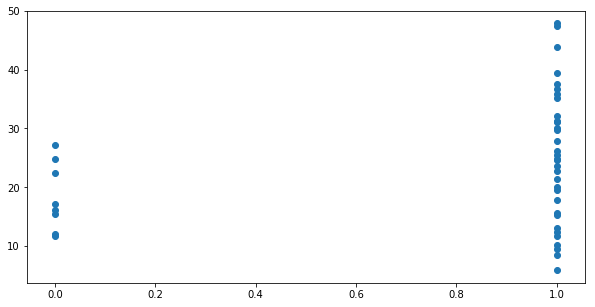

In [550]:
pl.scatter(validation1.gentrification, validation1.renovation_index)

In [551]:
validation1.groupby("gentrification").mean()

Unnamed: 0       zipcode     RegionID    RegionName  \
gentrification                                                        
0.0             137.500000  10932.500000  61941.87500  10932.500000   
1.0             105.090909  10707.606061  61866.69697  10707.606061   

                   SizeRank  2010-11  2010-12  2011-01  2011-02  2011-03  \
gentrification                                                             
0.0              427.250000      NaN      NaN      NaN      NaN      NaN   
1.0             1311.575758      NaN      NaN      NaN      NaN      NaN   

                2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  2011-10  \
gentrification                                                                  
0.0                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1.0                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                2011-11      2011-12      2012-01      2012-02      2012-03  \
gentrification                                                                
0.0                 NaN  1587.750000  1588.625000  1592.000000  1598.250000   
1.0                 NaN  2011.606061  2013.787879  2022.969697  2039.454545   

                    2012-04      2012-05      2012-06      2012-07  \
gentrification                                                       
0.0             1603.875000  1614.250000  1627.250000  1640.250000   
1.0             2061.060606  2084.363636  2097.969697  2103.090909   

                    2012-08      2012-09      2012-10      2012-11  \
gentrification                                                       
0.0             1652.625000  1653.000000  1650.375000  1643.750000   
1.0             2102.363636  2099.545455  2092.454545  2093.878788   

                    2012-12     2013-01      2013-02      2013-03  \
gentrification                                                      
0.0             1647.125000  1650.12500  1655.375000  1659.875000   
1.0             2100.878788  2112.69697  2131.333333  2145.878788   

                    2013-04      2013-05      2013-06      2013-07  \
gentrification                                                       
0.0             1671.000000  1690.625000  1711.000000  1726.250000   
1.0             2162.666667  2178.666667  2193.121212  2215.272727   

                    2013-08      2013-09      2013-10      2013-11  \
gentrification                                                       
0.0             1726.500000  1722.750000  1716.000000  1721.250000   
1.0             2227.424242  2245.151515  2254.848485  2276.181818   

                    2013-12      2014-01      2014-02      2014-03  \
gentrification                                                       
0.0             1732.375000  1748.625000  1767.125000  1777.625000   
1.0             2289.515152  2309.424242  2321.818182  2333.757576   

                    2014-04      2014-05      2014-06      2014-07  \
gentrification                                                       
0.0             1787.250000  1789.625000  1796.000000  1808.750000   
1.0             2346.636364  2354.757576  2362.727273  2370.909091   

                    2014-08     2014-09      2014-10      2014-11  \
gentrification                                                      
0.0             1823.625000  1849.75000  1872.750000  1895.250000   
1.0             2388.939394  2418.69697  2453.606061  2490.909091   

                    2014-12      2015-01      2015-02      2015-03  \
gentrification                                                       
0.0             1904.125000  1901.000000  1901.750000  1921.750000   
1.0             2518.242424  2543.515152  2565.878788  2583.969697   

                    2015-04      2015-05      2015-06      2015-07  \
gentrification                                                       
0.0             1941.375000  1955.750000  1966.250000  1973.375000   
1.0             2600.363636  2609.151515  2619.333333

In [552]:
cols=["n/o", "count_major_renovation"] 
X3=validation1[cols]
Y3=validation1['gentrification']

In [553]:
logit_model3=sm.Logit(Y3,X3)
result=logit_model3.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467058
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Jun 2018   Pseudo R-squ.:                 0.05370
Time:                        15:46:50   Log-Likelihood:                -19.149
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                    0.1404
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
n/o                        1.8809      1.035      1.818      0.069        -0.147    

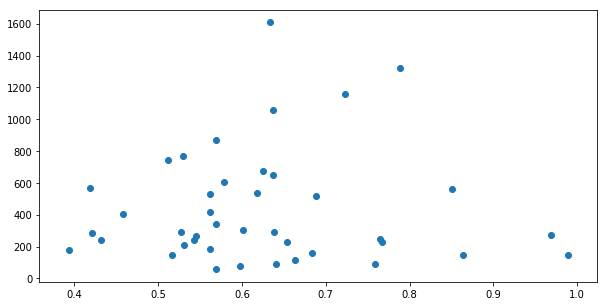

In [554]:
pl.scatter(validation1["n/o"], validation1.count_major_renovation)

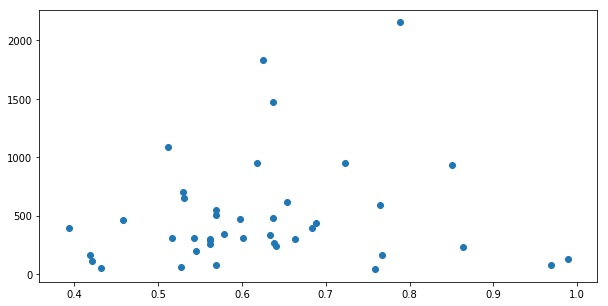

In [555]:
pl.scatter(validation1["n/o"], validation1.count_new_buildings)

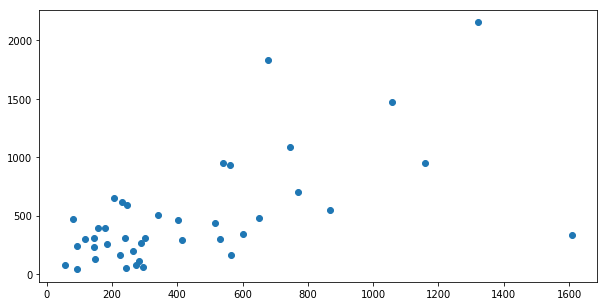

In [556]:
pl.scatter(validation1.count_major_renovation, validation1.count_new_buildings)

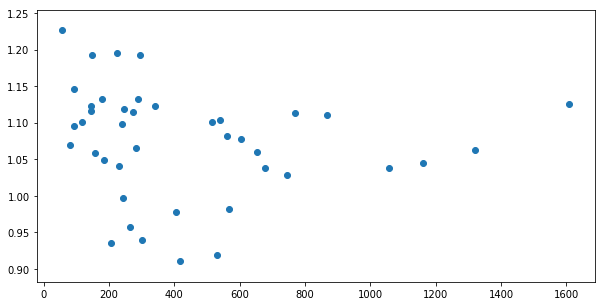

In [557]:
pl.scatter(validation1.count_major_renovation, validation1.increase_3_year)

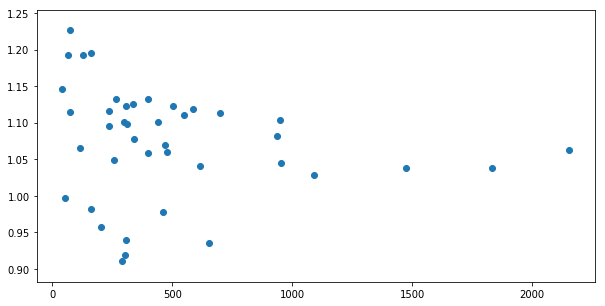

In [558]:
pl.scatter(validation1.count_new_buildings, validation1.increase_3_year)

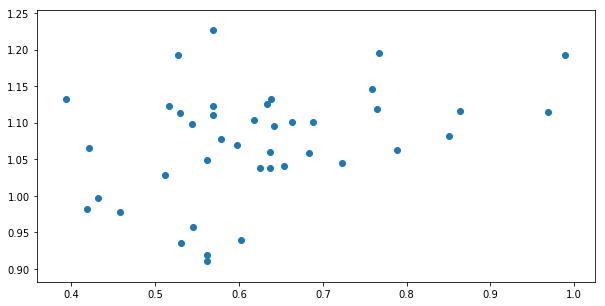

In [559]:
pl.scatter(validation1["n/o"], validation1.increase_3_year)

# Other stuff without rent

In [560]:
validation2 = pd.merge(ultimate_df_, furman, on = "ZIPCODE")

In [561]:
validation2 = gp.GeoDataFrame(validation2)

In [562]:
validation2.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Bldg Type',
       'Residential', 'Special District 1', 'Special District 2', 'Work Type',
       'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence #',
       'Permit Subtype', 'Oil Gas', 'Site Fill', 'Filing Date',
       'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
       'Owner

Text(0.5,1,'Furman')

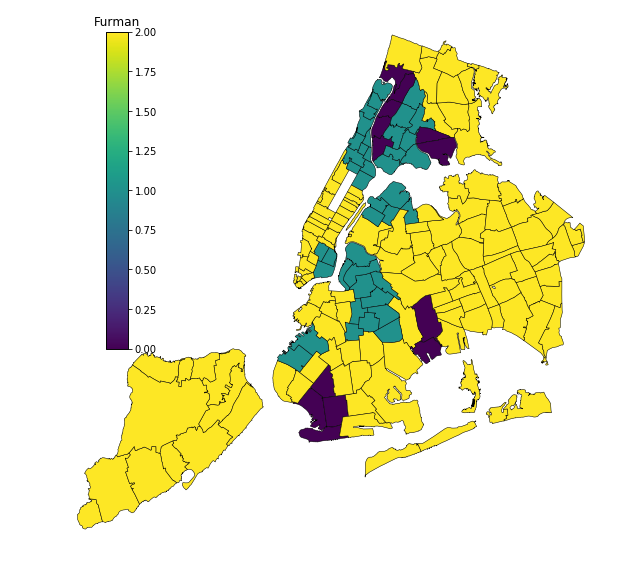

In [563]:
cp.choroplethNYC(validation2, column="gentrification", color="k",cmap="viridis", edgecolor="k", lw=0.5);
pl.title("Furman")

Text(0.5,1,'Index')

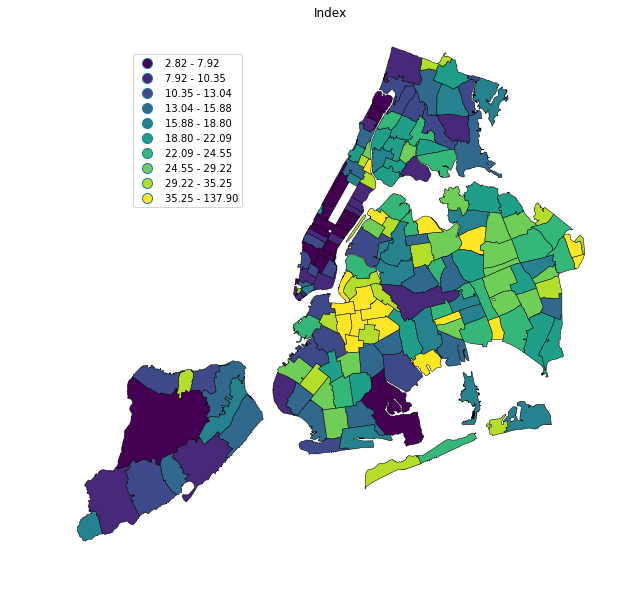

In [564]:
cp.choroplethNYC(validation2, column="renovation_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Index")

In [565]:
final_index_data.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0     61639       10025  New York    NY  New York   New York         1   
1     61637       10023  New York    NY  New York   New York         3   
2     61616       10002  New York    NY  New York   New York         9   
3     61807       10467  New York    NY  New York      Bronx        10   
4     62037       11226  New York    NY  New York      Kings        14   

   2010-11  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  2012-01  2012-02  \
0      NaN      NaN      NaN      NaN      NaN   2963.0   2970.0   2997.0   
1      NaN      NaN      NaN      NaN      NaN   3212.0   3183.0   3208.0   
2      NaN      NaN      NaN      NaN      NaN   3091.0   3088.0   3113.0   
3      NaN      NaN      NaN      NaN      NaN   1492.0   1481.0   1488.0   
4      NaN      NaN      NaN      NaN      NaN   1578.0   1581.0   1594.0   

   2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  2012-09  2012-10  \
0   3012.0   3010.0   2997.0   2979.0   2975.0   3013.0   3064.0   3085.0   
1   3240.0   3267.0   3291.0   3286.0   3288.0   3302.0   3334.0   3354.0   
2   3111.0   3129.0   3161.0   3190.0   3208.0   3221.0   3230.0   3250.0   
3   1496.0   1499.0   1498.0   1500.0   1512.0   1530.0   1541.0   1543.0   
4   1604.0   1612.0   1611.0   1625.0   1626.0   1635.0   1642.0   1658.0   

   2012-11  2012-12  2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  \
0   3082.0   3111.0   3151.0   3165.0   3168.0   3182.0   3225.0   3272.0   
1   3347.0   3343.0   3334.0   3313.0   3336.0   3375.0   3445.0   3465.0   
2   3266.0   3270.0   3265.0   3245.0   3241.0   3249.0   3284.0   3309.0   
3   1556.0   1551.0   1536.0   1525.0   1522.0   1537.0   1558.0   1583.0   
4   1676.0   1694.0   1716.0   1734.0   1757.0   1774.0   1809.0   1831.0   

   2013-07  2013-08  2013-09  2013-10  2013-11  2013-12  2014-01  2014-02  \
0   3297.0   3257.0   3211.0   3215.0   3238.0   3296.0   3338.0   3381.0   
1   3477.0   3438.0   3428.0   3441.0   3484.0   3555.0   3601.0   3614.0   
2   3296.0   3256.0   3228.0   3263.0   3323.0   3380.0   3407.0   3427.0   
3   1591.0   1585.0   1573.0   1575.0   1590.0   1595.0   1597.0   1594.0   
4   1852.0   1850.0   1853.0   1855.0   1885.0   1923.0   1959.0   1972.0   

   2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  \
0   3398.0   3381.0   3376.0   3361.0   3384.0   3409.0   3450.0   3491.0   
1   3581.0   3550.0   3557.0   3562.0   3599.0   3647.0   3713.0   3813.0   
2   3434.0   3446.0   3451.0   3459.0   3506.0   3571.0   3639.0   3719.0   
3   1587.0   1583.0   1579.0   1576.0   1578.0   1598.0   1629.0   1659.0   
4   1983.0   1991.0   1990.0   1992.0   2004.0   2023.0   2032.0   2024.0   

   2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  \
0   3537.0   3543.0   3541.0   3551.0   3585.0   3655.0   3694.0   3730.0   
1   3904.0   3974.0   4012.0   4059.0   4059.0   4069.0   4039.0   4084.0   
2   3784.0   3836.0   3865.0   3900.0   3913.0   3924.0   3911.0   3908.0   
3   1688.0   1699.0   1707.0   1715.0   1728.0   1736.0   1744.0   1747.0   
4   2009.0   2001.0   1990.0   1991.0   2015.0   2029.0   2034.0   2028.0   

   2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  \
0   3715.0   3718.0   3706.0   3675.0   3641.0   3618.0     3623     3620   
1   4083.0   4099.0   4053.0   3974.0   3925.0   3897.0     3915     3969   
2   3889.0   3886.0   3864.0   3781.0   3731.0   3707.0     3755     3781   
3   1744.

In [566]:
final_index_data_["average_rent_2017"] = (final_index_data_["2017-01"] + final_index_data_["2017-02"] +final_index_data_["2017-03"] +final_index_data_["2017-04"] +final_index_data_["2017-05"] +final_index_data_["2017-06"] +final_index_data_["2017-07"] +final_index_data_["2017-08"] +final_index_data_["2017-09"] +final_index_data_["2017-10"] +final_index_data_["2017-11"] +final_index_data_["2017-12"])/12
final_index_data_["average_rent_2014"] = (final_index_data_["2014-01"] + final_index_data_["2014-02"] +final_index_data_["2014-03"] +final_index_data_["2014-04"] +final_index_data_["2014-05"] +final_index_data_["2014-06"] +final_index_data_["2014-07"] +final_index_data_["2014-08"] +final_index_data_["2014-09"] +final_index_data_["2014-10"] +final_index_data_["2014-11"] +final_index_data_["2014-12"])/12

final_index_data_["increase_3_year"] = final_index_data_["average_rent_2017"] / final_index_data_["average_rent_2014"]
final_index_data_["renovation_index_with_rent"] = 1000000 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] + final_index_data_["count_major_renovation"]) / (final_index_data_["AREA"] * final_index_data.BOROUGH) * final_index_data_["AREA"]**0.5
final_index_data_["3_year_absolute_rent_increase"] = final_index_data_["average_rent_2017"]-final_index_data_["average_rent_2014"]





Text(0.5,1,'Percentual Increase')

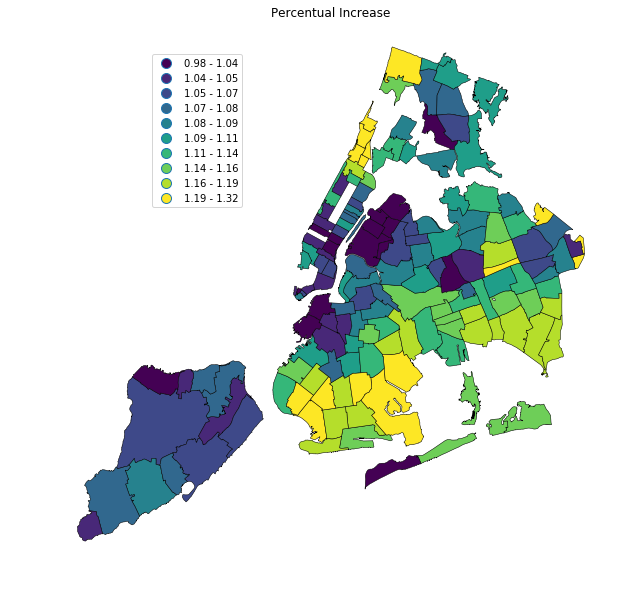

In [567]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Percentual Increase")

Text(0.5,1,'Absolute Increase')

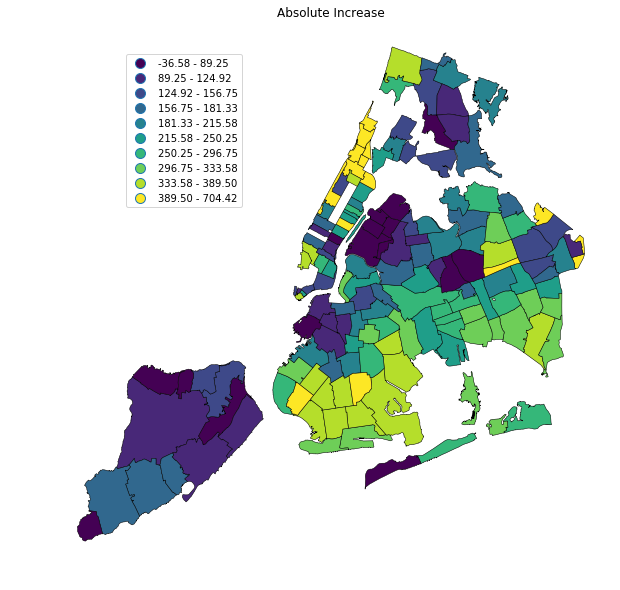

In [568]:
cp.choroplethNYC(final_index_data_, column="3_year_absolute_rent_increase", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Absolute Increase")

Text(0.5,1,'Gentrification index by Zip Code in NYC')

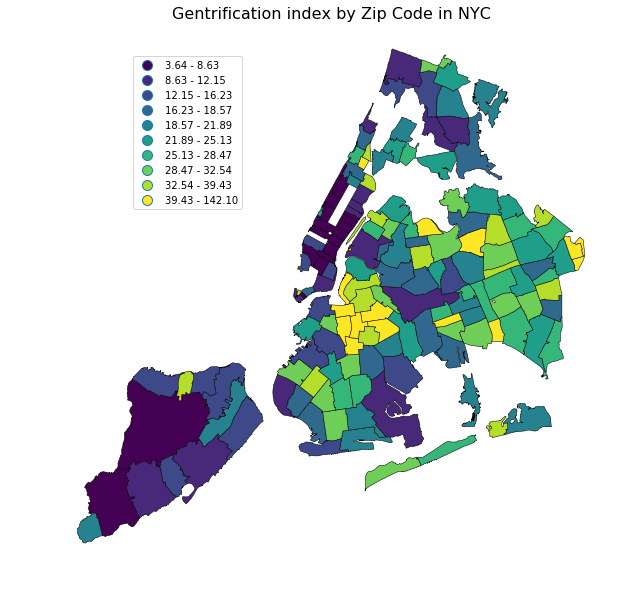

In [569]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Gentrification index by Zip Code in NYC", fontsize = 16)

In [600]:
ensayo = validation[validation["renovation_index_with_rent"]<130]
ensayo1 = ensayo.groupby("gentrification").mean()

In [601]:
validation = pd.merge(furman, final_index_data_, on = "ZIPCODE")
validation = gp.GeoDataFrame(validation)
test = validation.groupby("gentrification").mean()

(0, 60)

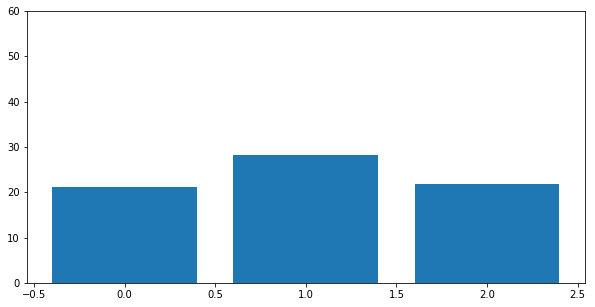

In [602]:
pl.bar(ensayo1.index, ensayo1.renovation_index_with_rent)
pl.ylim(0,60)

Text(0.5,1,'Average gentrification index')

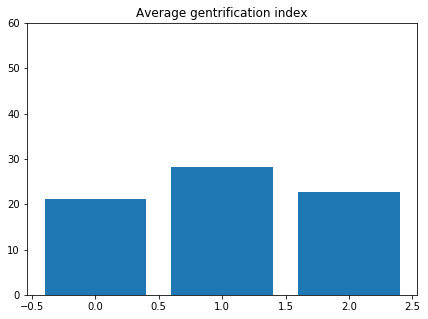

In [603]:
figure=figsize(7,5)
pl.bar(test.index, test.renovation_index_with_rent)
pl.ylim(0,60)
pl.title("Average gentrification index")

(0, 60)

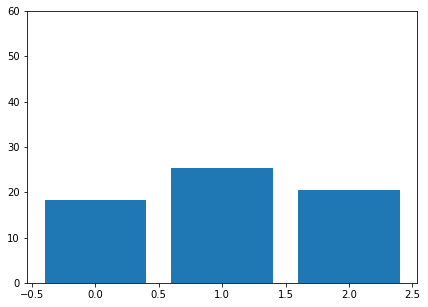

In [604]:
pl.bar(test.index, test.renovation_index)
pl.ylim(0,60)

In [605]:
validation.gentrification.value_counts()

2    120
1     33
0      8
Name: gentrification, dtype: int64

In [606]:
Major_Renovation_.shape

(212, 6)

In [607]:
validation1  = validation[validation["gentrification"]!=2]

In [608]:
validation.head()

Unnamed: 0  zipcode  gentrification ZIPCODE  RegionID  RegionName  \
0           5    10001               2   10001     61615       10001   
1           6    10002               1   10002     61616       10002   
2           7    10003               1   10003     61617       10003   
3           8    10004               2   10004     61618       10004   
4           9    10005               2   10005     61619       10005   

       City State     Metro CountyName  SizeRank  2010-11  2010-12  2011-01  \
0  New York    NY  New York   New York      1786      NaN      NaN      NaN   
1  New York    NY  New York   New York         9      NaN      NaN      NaN   
2  New York    NY  New York   New York        45      NaN      NaN      NaN   
3  New York    NY  New York   New York     11103      NaN      NaN      NaN   
4  New York    NY  New York   New York      7161      NaN      NaN      NaN   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0      NaN      NaN   3291.0   3264.0   3283.0   3310.0   3343.0   3359.0   
1      NaN      NaN   3091.0   3088.0   3113.0   3111.0   3129.0   3161.0   
2      NaN      NaN   3337.0   3286.0   3286.0   3313.0   3336.0   3362.0   
3      NaN      NaN   3509.0   3515.0   3558.0   3572.0   3596.0   3628.0   
4      NaN      NaN   3336.0   3331.0   3358.0   3370.0   3405.0   3428.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   3344.0   3336.0   3350.0   3375.0   3412.0   3411.0   3420.0   3408.0   
1   3190.0   3208.0   3221.0   3230.0   3250.0   3266.0   3270.0   3265.0   
2   3362.0   3368.0   3385.0   3405.0   3424.0   3421.0   3418.0   3406.0   
3   3637.0   3649.0   3646.0   3669.0   3690.0   3673.0   3675.0   3612.0   
4   3435.0   3439.0   3441.0   3452.0   3486.0   3516.0   3545.0   3514.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3387.0   3369.0   3380.0   3432.0   3467.0   3481.0   3452.0   3470.0   
1   3245.0   3241.0   3249.0   3284.0   3309.0   3296.0   3256.0   3228.0   
2   3381.0   3366.0   3388.0   3462.0   3524.0   3525.0   3478.0   3480.0   
3   3574.0   3560.0   3600.0   3666.0   3692.0   3703.0   3668.0   3660.0   
4   3490.0   3476.0   3488.0   3516.0   3526.0   3532.0   3505.0   3497.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3523.0   3578.0   3629.0   3647.0   3657.0   3624.0   3614.0   3613.0   
1   3263.0   3323.0   3380.0   3407.0   3427.0   3434.0   3446.0   3451.0   
2   3539.0   3611.0   3667.0   3694.0   3702.0   3660.0   3647.0   3654.0   
3   3667.0   3684.0   3702.0   3748.0   3797.0   3824.0   3816.0   3783.0   
4   3507.0   3527.0   3528.0   3534.0   3567.0   3605.0   3627.0   3604.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3619.0   3649.0   3705.0   3744.0   3815.0   3880.0   3945.0   3998.0   
1   3459.0   3506.0   3571.0   3639.0   3719.0   3784.0   3836.0   3865.0   
2   3668.0   3716.0   3788.0   3866.0   3990.0   4110.0   4226.0   4282.0   
3   3787.0   3830.0   3918.0   3958.0   3995.0   4055.0   4101.0   4138.0   
4   3611.0   3632.0   3702.0   3733.0   3798.0   3831.0   3860.0   3876.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   4062.0   4109.0   4125.0   4097.0   4085.0   4058.0   4055.0   4042.0   
1   3900.0   3913.0   3924.0   3911.0   3908.0   3889.0   3886.0   3864.0   
2   4349.0   4392.0   4408.0   4364.0   4343.0   4334.0   4353.0   4329.0   
3   4145.

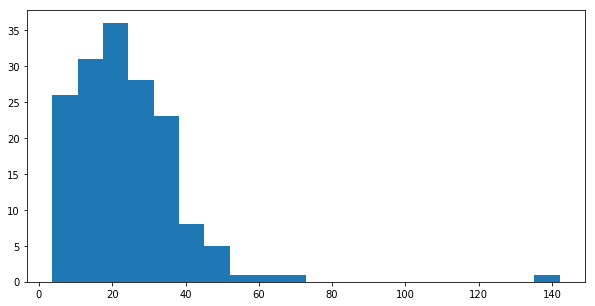

In [609]:
figure = figsize(10,5)
pl.hist(validation.renovation_index_with_rent, bins = 20);

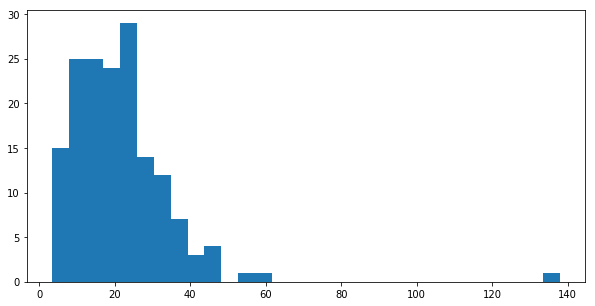

In [610]:
pl.hist(validation.renovation_index, bins=30);

In [611]:
print ("with rent mean",validation.renovation_index_with_rent.mean())
print ("without rent mean", validation.renovation_index.mean())
print ("with rent std",validation.renovation_index_with_rent.std())
print ("without rent std",validation.renovation_index.std())

with rent mean 23.7671165058
without rent mean 21.4171240062
with rent std 15.2694047561
without rent std 14.0775114065


In [612]:
ensayo.renovation_index_with_rent.mean()

23.02756043179189

In [613]:
ensayo.renovation_index_with_rent.std()

12.083436078956733

In [614]:
len(ensayo.renovation_index_with_rent)

160

In [616]:
np.random.seed(123)

k = 22.926126579333687
std = 12.083436078956733
samp = np.random.normal(k, std, 160)

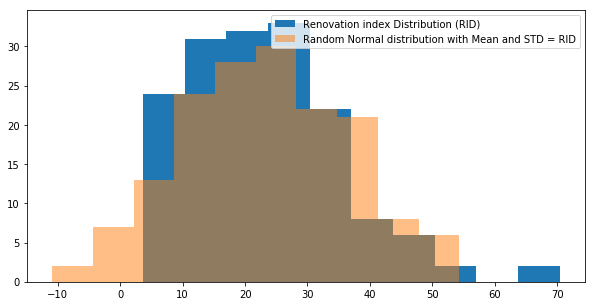

In [618]:
figure = figsize(10,5)
pl.hist(ensayo.renovation_index_with_rent, bins = 10, label="Renovation index Distribution (RID)");
pl.hist(samp, bins = 10, alpha = 0.5, label = "Random Normal distribution with Mean and STD = RID");
pl.legend()

In [619]:
validation.head()

Unnamed: 0  zipcode  gentrification ZIPCODE  RegionID  RegionName  \
0           5    10001               2   10001     61615       10001   
1           6    10002               1   10002     61616       10002   
2           7    10003               1   10003     61617       10003   
3           8    10004               2   10004     61618       10004   
4           9    10005               2   10005     61619       10005   

       City State     Metro CountyName  SizeRank  2010-11  2010-12  2011-01  \
0  New York    NY  New York   New York      1786      NaN      NaN      NaN   
1  New York    NY  New York   New York         9      NaN      NaN      NaN   
2  New York    NY  New York   New York        45      NaN      NaN      NaN   
3  New York    NY  New York   New York     11103      NaN      NaN      NaN   
4  New York    NY  New York   New York      7161      NaN      NaN      NaN   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0      NaN      NaN   3291.0   3264.0   3283.0   3310.0   3343.0   3359.0   
1      NaN      NaN   3091.0   3088.0   3113.0   3111.0   3129.0   3161.0   
2      NaN      NaN   3337.0   3286.0   3286.0   3313.0   3336.0   3362.0   
3      NaN      NaN   3509.0   3515.0   3558.0   3572.0   3596.0   3628.0   
4      NaN      NaN   3336.0   3331.0   3358.0   3370.0   3405.0   3428.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   3344.0   3336.0   3350.0   3375.0   3412.0   3411.0   3420.0   3408.0   
1   3190.0   3208.0   3221.0   3230.0   3250.0   3266.0   3270.0   3265.0   
2   3362.0   3368.0   3385.0   3405.0   3424.0   3421.0   3418.0   3406.0   
3   3637.0   3649.0   3646.0   3669.0   3690.0   3673.0   3675.0   3612.0   
4   3435.0   3439.0   3441.0   3452.0   3486.0   3516.0   3545.0   3514.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3387.0   3369.0   3380.0   3432.0   3467.0   3481.0   3452.0   3470.0   
1   3245.0   3241.0   3249.0   3284.0   3309.0   3296.0   3256.0   3228.0   
2   3381.0   3366.0   3388.0   3462.0   3524.0   3525.0   3478.0   3480.0   
3   3574.0   3560.0   3600.0   3666.0   3692.0   3703.0   3668.0   3660.0   
4   3490.0   3476.0   3488.0   3516.0   3526.0   3532.0   3505.0   3497.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3523.0   3578.0   3629.0   3647.0   3657.0   3624.0   3614.0   3613.0   
1   3263.0   3323.0   3380.0   3407.0   3427.0   3434.0   3446.0   3451.0   
2   3539.0   3611.0   3667.0   3694.0   3702.0   3660.0   3647.0   3654.0   
3   3667.0   3684.0   3702.0   3748.0   3797.0   3824.0   3816.0   3783.0   
4   3507.0   3527.0   3528.0   3534.0   3567.0   3605.0   3627.0   3604.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3619.0   3649.0   3705.0   3744.0   3815.0   3880.0   3945.0   3998.0   
1   3459.0   3506.0   3571.0   3639.0   3719.0   3784.0   3836.0   3865.0   
2   3668.0   3716.0   3788.0   3866.0   3990.0   4110.0   4226.0   4282.0   
3   3787.0   3830.0   3918.0   3958.0   3995.0   4055.0   4101.0   4138.0   
4   3611.0   3632.0   3702.0   3733.0   3798.0   3831.0   3860.0   3876.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   4062.0   4109.0   4125.0   4097.0   4085.0   4058.0   4055.0   4042.0   
1   3900.0   3913.0   3924.0   3911.0   3908.0   3889.0   3886.0   3864.0   
2   4349.0   4392.0   4408.0   4364.0   4343.0   4334.0   4353.0   4329.0   
3   4145.

In [620]:
non_gentrifying = validation[validation["gentrification"]==0]
gentrifying = validation[validation["gentrification"]==1]
high_income = validation[validation["gentrification"]==2]

In [621]:
high_income = high_income[high_income["renovation_index_with_rent"]<40]

In [622]:
print ("this is the mean for non gentrifying",non_gentrifying.renovation_index_with_rent.mean())
print ("this is the mean for gentrifying",gentrifying.renovation_index_with_rent.mean())
print ("this is the mean for high income",high_income.renovation_index_with_rent.mean())
print ()
print ("this is the std for non gentrifying",non_gentrifying.renovation_index_with_rent.std())
print ("this is the std for gentrifying",gentrifying.renovation_index_with_rent.std())
print ("this is the std for high income",high_income.renovation_index_with_rent.std())

this is the mean for non gentrifying 21.2524665601
this is the mean for gentrifying 28.1556103685
this is the mean for high income 19.8743538607

this is the std for non gentrifying 6.89403816491
this is the std for gentrifying 12.5689722495
this is the std for high income 9.20075012302


(array([ 2.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([ 13.71660503,  15.59783942,  17.4790738 ,  19.36030819,
         21.24154257,  23.12277696,  25.00401135,  26.88524573,
         28.76648012,  30.6477145 ,  32.52894889]),
 <a list of 10 Patch objects>)

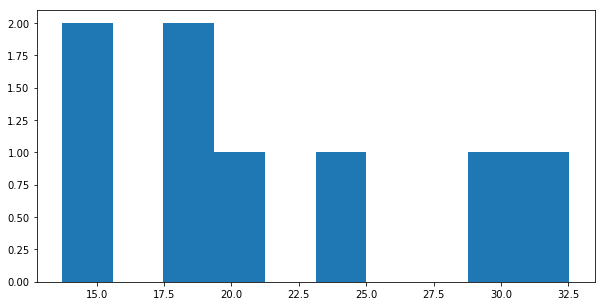

In [623]:
pl.hist(non_gentrifying.renovation_index_with_rent)

(array([ 3.,  3.,  4.,  4.,  4.,  4.,  5.,  1.,  3.,  2.]),
 array([  6.2467176 ,  10.91612333,  15.58552906,  20.25493479,
         24.92434052,  29.59374625,  34.26315198,  38.9325577 ,
         43.60196343,  48.27136916,  52.94077489]),
 <a list of 10 Patch objects>)

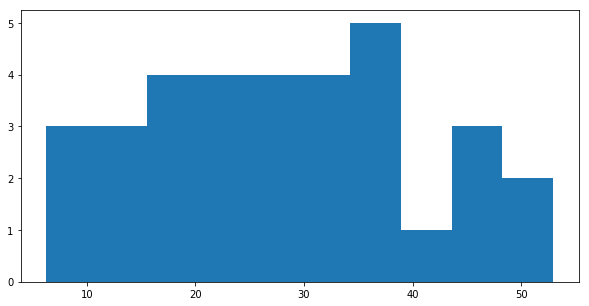

In [624]:
pl.hist(gentrifying.renovation_index_with_rent)

(array([  8.,  16.,  12.,  15.,  13.,  15.,  12.,   8.,  10.,   3.]),
 array([  3.63663292,   7.23904019,  10.84144747,  14.44385474,
         18.04626202,  21.64866929,  25.25107657,  28.85348384,
         32.45589112,  36.05829839,  39.66070567]),
 <a list of 10 Patch objects>)

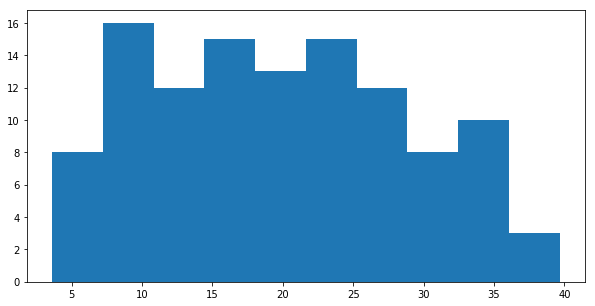

In [625]:
pl.hist(high_income.renovation_index_with_rent, bins = 10)

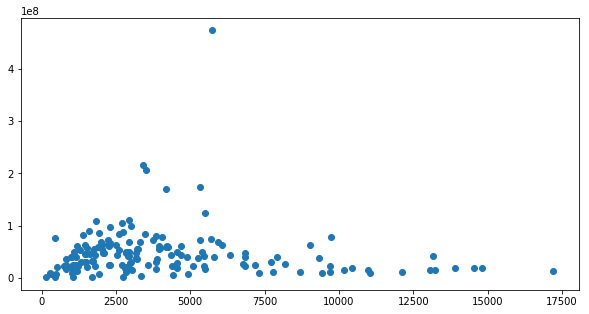

In [626]:
pl.scatter(final_index_data.BOROUGH, final_index_data["AREA"])